# EDA & Modelling

## Package loading

In [1]:
from EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
import keras
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from keras.callbacks import EarlyStopping
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LayerNormalization
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from keras.utils import np_utils
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from yellowbrick.classifier import classification_report
from yellowbrick.classifier import class_prediction_error
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier.threshold import discrimination_threshold
from yellowbrick.features import pca_decomposition
from yellowbrick.features import rank1d
from yellowbrick.features import rank2d
from yellowbrick.target import balanced_binning_reference
from yellowbrick.target import class_balance
from keras.utils.vis_utils import plot_model
from yellowbrick.model_selection import learning_curve
from yellowbrick.model_selection import feature_importances
from yellowbrick.contrib.missing import MissingValuesBar
from yellowbrick.contrib.missing import MissingValuesDispersion
from yellowbrick.target.feature_correlation import feature_correlation


## Exploratory Data Analysis 

### File and parameters loading

In [2]:
problem_type = 'classification'

In [3]:
stacking = 'True'

In [4]:
data_size = 'small'

In [5]:
df = pd.read_csv('/home/philippe/Documents/python project/EZStacking-v0.13/dataset/iris.csv')

In [6]:
target_col = 'variety'

#### Thresholds

In [7]:
threshold_NaN = 0.5

In [8]:
threshold_cat = 5

In [9]:
threshold_Z = 3.0

In [10]:
threshold_corr = 0.95

In [11]:
threshold_model = 5

In [12]:
threshold_score = 0.5

#### Drop user's columns:

In [13]:
user_drop_cols = []

In [14]:
df = df.drop(user_drop_cols, axis=1)

#### Dataset copy

In [15]:
df_copy = df.copy()

### Dataset Information

In [16]:
df.shape

(150, 5)

#### Some records

In [17]:
display(df)

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Dataframe structure

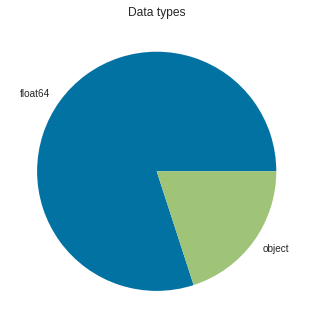

In [18]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [19]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### Which columns could be categorical ?

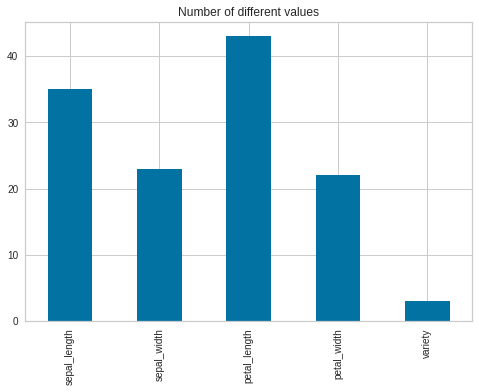

In [20]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [21]:
duplicates(df)

Number of rows before removing: 150
Number of duplicate rows: 1
Number of rows after removing: 149


,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### Drop NaN:

In [22]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Final set of dropped columns

In [23]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [24]:
display(dropped_cols)

array([], dtype=float64)

#### Encoding data:

In [25]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: sepal_length
Encoding numeric column: sepal_width
Encoding numeric column: petal_length
Encoding numeric column: petal_width
Encoding object column: variety


#### Imputing NaN using IterativeImputer

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


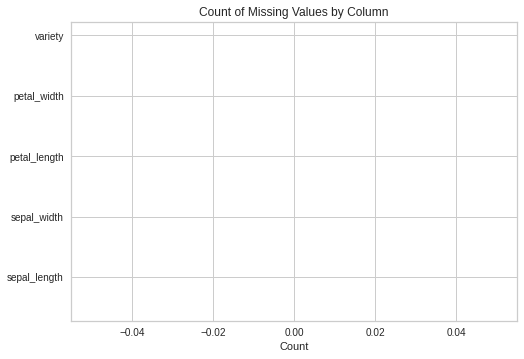

In [26]:
visualizer = MissingValuesBar(features=df.select_dtypes(include=np.number).columns.tolist())
visualizer.fit(df.select_dtypes(include=np.number))
visualizer.show();

##### Imputation

In [27]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [28]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.01MB
Memory usage after optimization is: 0.00MB
Decreased by 75.9%


##### Dataframe structure after compression

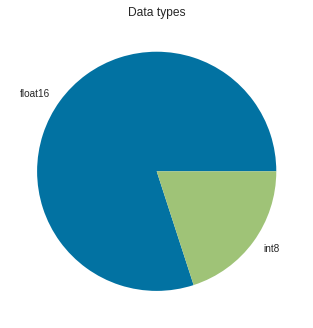

In [29]:
plot_dataframe_structure(df)

#### Outliers:

In [30]:
df = outliers(df, threshold_Z)

Using Z_score,  1  rows will be suppressed.


#### Splitting dataframe in features and targets

In [31]:
y = df[target_col]

In [32]:
X = df.drop(target_col, axis=1)

### Plottings

#### Ranking 

##### Ranking 1D 

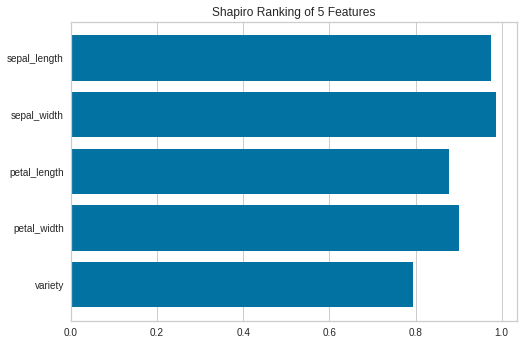

In [33]:
rank1d(df);

##### Ranking 2D 

###### Ranking 2D according to Pearson

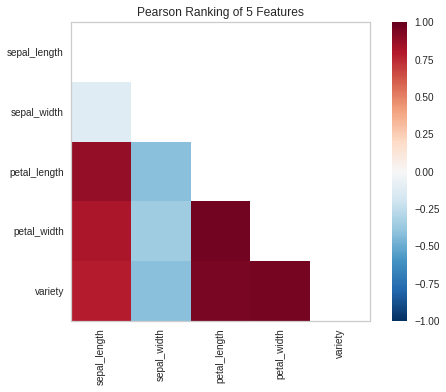

In [34]:
rank2d(df, algorithm='pearson');

###### Ranking 2D based on covariance

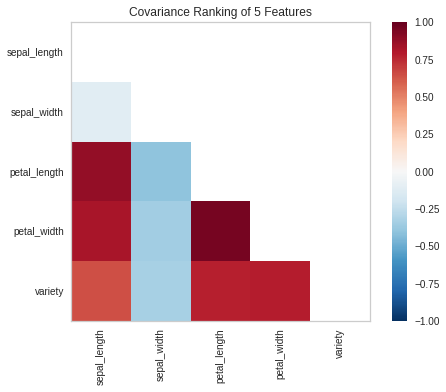

In [35]:
rank2d(df, algorithm='covariance');

###### Ranking 2D according to Spearman

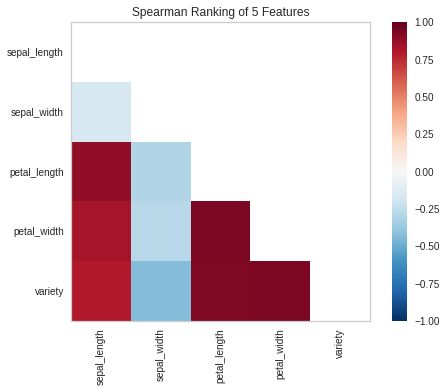

In [36]:
rank2d(df, algorithm='spearman');

###### Ranking 2D according to Kendalltau

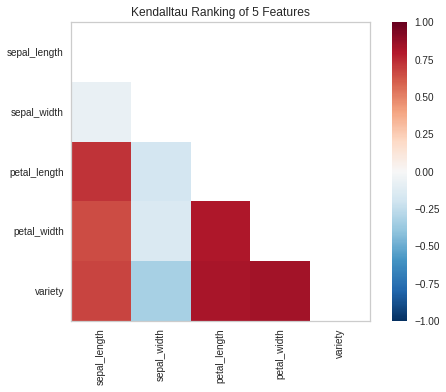

In [37]:
rank2d(df, algorithm='kendalltau');

#### Correlation

##### Correlation with Yellow Bricks

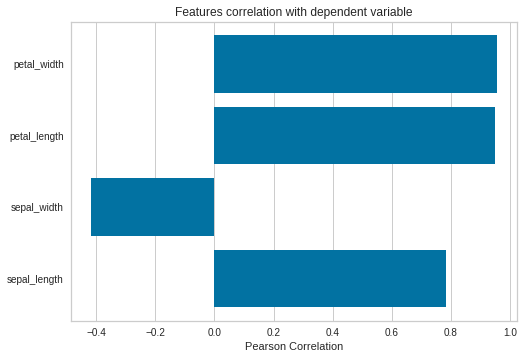

In [38]:
feature_correlation(X, y);

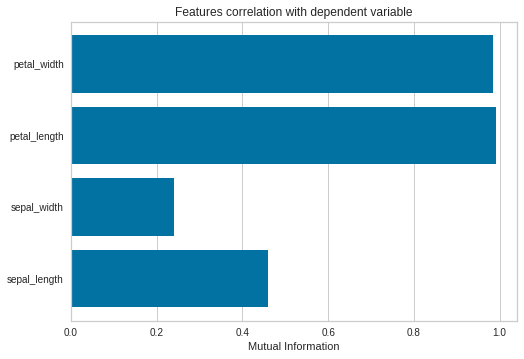

In [39]:
feature_correlation(X, y, method='mutual_info-classification');

#### Feature importance (a priori)

##### According to decision tree

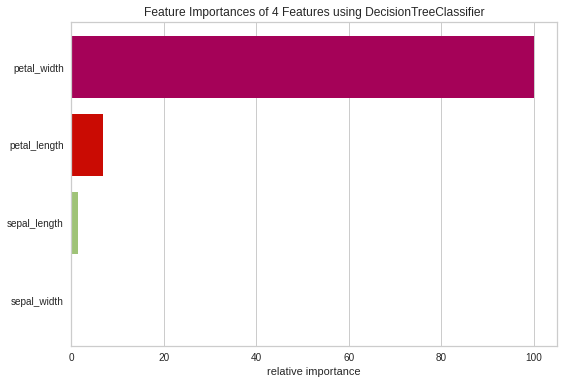

In [40]:
feature_importances(DecisionTreeClassifier(), X, y);

##### According to logistic regression

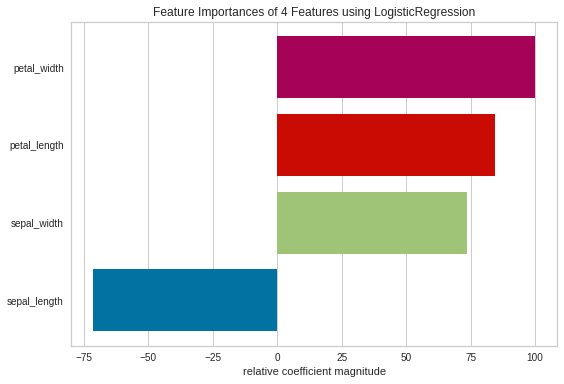

In [41]:
feature_importances(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, y);

#### PCA

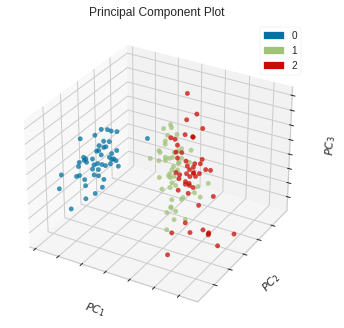

In [42]:
pca_decomposition(X, y.astype(int), projection=3);

#### Class balancing

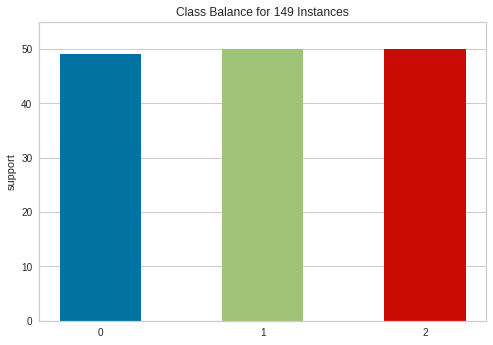

Entropy =  0.9999589074278229


In [43]:
class_balance(y)
print('Entropy = ', shannon_entropy(y))

#### Check columns that should be dropped

In [44]:
print(dropped_cols)

[]


## Splittings 

In [45]:
df = df_copy

#### Splitting dataframe in features and targets

In [46]:
y = df[target_col]

In [47]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [48]:
nb_features = len(X.columns.tolist())

In [49]:
nb_targets = len(y.unique())

In [50]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [51]:
X_train, X_test, y_train, y_test = split(X, y, test_size=0.33)

##### Encoding

In [52]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

##### Encoding for Keras early stopping

In [53]:
target_encoder_K = OneHotEncoder() 
y_train_K = target_encoder_K.fit_transform(y_train.values.reshape(-1, 1)).todense() 
y_test_K = target_encoder_K.transform(y_test.values.reshape(-1, 1)).todense()

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [54]:
cat_selector = make_column_selector(dtype_include=object)

In [55]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [56]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), Decorrelator(threshold_corr))

In [57]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), Decorrelator(threshold_corr))

In [58]:
tree_preprocessor = make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector))

##### For models not based on tree

In [59]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False), Decorrelator(threshold_corr))

In [60]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler(), Decorrelator(threshold_corr))

In [61]:
ntree_preprocessor = make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector))

##### Keras neural network definition

In [71]:
def K_Class(): 
    keras.backend.clear_session() 
#   neural network architecture: start 
    model = Sequential() 
    model.add(Dense(layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(layer_size, activation='relu')) 
    model.add(BatchNormalization()) 
    model.add(Dropout(0.2)) 
#    model.add(LayerNormalization()) 
    model.add(Dense(nb_targets, activation='softmax')) 
#   neural network architecture: end   
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


##### Early Stopping

In [72]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=20)

In [73]:
set_config(display='diagram') 
ntree_preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True)),
                                                 ('standardscaler',
                                                  StandardScaler()),
                                                 ('decorrelator',
                                                  Decorrelator(threshold=0.95))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8c0b4c6a0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('decorrelator',
                                                  Decorrelator(threshold=0.95))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8c0b47ca0>)])

In [74]:
K_C = KerasClassifier(K_Class,batch_size=64, epochs=2000, callbacks=[es],validation_data=(ntree_preprocessor.transform(X_test), y_test_K), verbose=1) 
K_C._estimator_type = 'classifier'

##### Level-0 models

In [75]:
level_0 = [ 
          ('GPCL', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPCR', make_pipeline(ntree_preprocessor, GaussianProcessClassifier(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('DTC', make_pipeline(tree_preprocessor, DecisionTreeClassifier(max_depth=5))), 
          ('RFC', make_pipeline(tree_preprocessor, RandomForestClassifier(max_depth=5, n_estimators=10, max_features='auto'))), 
          ('ABC', make_pipeline(tree_preprocessor, AdaBoostClassifier())), 
          ('HGBC', make_pipeline(tree_preprocessor, HistGradientBoostingClassifier(early_stopping=True))), 
          ('LOGR', make_pipeline(ntree_preprocessor, LogisticRegression())), 
          ('LOGRCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5))), 
          ('MLPC', make_pipeline(ntree_preprocessor, MLPClassifier(hidden_layer_sizes = (layer_size, layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNC', make_pipeline(ntree_preprocessor, KNeighborsClassifier(n_neighbors=len(y.unique())))), 
          ('GNB', make_pipeline(ntree_preprocessor, GaussianNB())), 
          ('KERC', make_pipeline(ntree_preprocessor, K_C)), 
          ]

##### Level-1 model

In [76]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9])

##### Stacking for classification

In [77]:
model = StackingClassifier(level_0, final_estimator=level_1)

### Model fitting

In [78]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

Epoch 1/2000
2/2 [==============================] - 4s 390ms/step - loss: 0.9199 - accuracy: 0.6200 - val_loss: 1.1400 - val_accuracy: 0.3400
Epoch 2/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.9226 - accuracy: 0.5800 - val_loss: 1.1314 - val_accuracy: 0.3400
Epoch 3/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.8113 - accuracy: 0.6300 - val_loss: 1.1230 - val_accuracy: 0.3400
Epoch 4/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.9279 - accuracy: 0.5400 - val_loss: 1.1144 - val_accuracy: 0.3600
Epoch 5/2000
2/2 [==============================] - 0s 83ms/step - loss: 0.8979 - accuracy: 0.5700 - val_loss: 1.1053 - val_accuracy: 0.3600
Epoch 6/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.9604 - accuracy: 0.5500 - val_loss: 1.0963 - val_accuracy: 0.3800
Epoch 7/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.7917 - accuracy: 0.6700 - val_loss: 1.0873 - val_accuracy: 0.4200
Epoch 8/2000

Epoch 59/2000
2/2 [==============================] - 0s 84ms/step - loss: 0.5657 - accuracy: 0.7500 - val_loss: 0.6226 - val_accuracy: 0.8200
Epoch 60/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.5225 - accuracy: 0.7400 - val_loss: 0.6166 - val_accuracy: 0.8200
Epoch 61/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.5246 - accuracy: 0.7500 - val_loss: 0.6110 - val_accuracy: 0.8200
Epoch 62/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.5766 - accuracy: 0.7300 - val_loss: 0.6052 - val_accuracy: 0.8200
Epoch 63/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.4959 - accuracy: 0.7600 - val_loss: 0.5995 - val_accuracy: 0.8200
Epoch 64/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.4200 - accuracy: 0.8100 - val_loss: 0.5939 - val_accuracy: 0.8200
Epoch 65/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.5228 - accuracy: 0.7300 - val_loss: 0.5885 - val_accuracy: 0.8200
Epoch 

2/2 [==============================] - 0s 69ms/step - loss: 0.3511 - accuracy: 0.8800 - val_loss: 0.3797 - val_accuracy: 0.9200
Epoch 117/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.3502 - accuracy: 0.8400 - val_loss: 0.3770 - val_accuracy: 0.9200
Epoch 118/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.3246 - accuracy: 0.8900 - val_loss: 0.3740 - val_accuracy: 0.9200
Epoch 119/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.3029 - accuracy: 0.9100 - val_loss: 0.3711 - val_accuracy: 0.9200
Epoch 120/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.3395 - accuracy: 0.8200 - val_loss: 0.3683 - val_accuracy: 0.9000
Epoch 121/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.3523 - accuracy: 0.8700 - val_loss: 0.3655 - val_accuracy: 0.9000
Epoch 122/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.3346 - accuracy: 0.8300 - val_loss: 0.3628 - val_accuracy: 0.9000
Epoch 123/2000

2/2 [==============================] - 0s 82ms/step - loss: 0.2751 - accuracy: 0.9100 - val_loss: 0.2624 - val_accuracy: 0.9200
Epoch 174/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.2527 - accuracy: 0.9300 - val_loss: 0.2609 - val_accuracy: 0.9200
Epoch 175/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.2432 - accuracy: 0.9500 - val_loss: 0.2595 - val_accuracy: 0.9200
Epoch 176/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2567 - accuracy: 0.9200 - val_loss: 0.2581 - val_accuracy: 0.9200
Epoch 177/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.2688 - accuracy: 0.9000 - val_loss: 0.2567 - val_accuracy: 0.9200
Epoch 178/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.2634 - accuracy: 0.9200 - val_loss: 0.2553 - val_accuracy: 0.9200
Epoch 179/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.2482 - accuracy: 0.9500 - val_loss: 0.2541 - val_accuracy: 0.9200
Epoch 180/2000

2/2 [==============================] - 0s 63ms/step - loss: 0.2684 - accuracy: 0.9000 - val_loss: 0.1982 - val_accuracy: 0.9400
Epoch 231/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.2712 - accuracy: 0.8900 - val_loss: 0.1975 - val_accuracy: 0.9400
Epoch 232/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.1762 - accuracy: 0.9500 - val_loss: 0.1964 - val_accuracy: 0.9400
Epoch 233/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2664 - accuracy: 0.8800 - val_loss: 0.1954 - val_accuracy: 0.9400
Epoch 234/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.2437 - accuracy: 0.9200 - val_loss: 0.1947 - val_accuracy: 0.9400
Epoch 235/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.1964 - accuracy: 0.9200 - val_loss: 0.1937 - val_accuracy: 0.9400
Epoch 236/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.2365 - accuracy: 0.9300 - val_loss: 0.1926 - val_accuracy: 0.9400
Epoch 237/2000

2/2 [==============================] - 0s 66ms/step - loss: 0.2222 - accuracy: 0.9400 - val_loss: 0.1609 - val_accuracy: 0.9400
Epoch 288/2000
2/2 [==============================] - 0s 80ms/step - loss: 0.1618 - accuracy: 0.9700 - val_loss: 0.1604 - val_accuracy: 0.9400
Epoch 289/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.1967 - accuracy: 0.9400 - val_loss: 0.1600 - val_accuracy: 0.9400
Epoch 290/2000
2/2 [==============================] - 0s 52ms/step - loss: 0.2025 - accuracy: 0.9200 - val_loss: 0.1599 - val_accuracy: 0.9400
Epoch 291/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.2026 - accuracy: 0.9300 - val_loss: 0.1600 - val_accuracy: 0.9400
Epoch 292/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.2129 - accuracy: 0.9300 - val_loss: 0.1597 - val_accuracy: 0.9400
Epoch 293/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.1532 - accuracy: 0.9900 - val_loss: 0.1590 - val_accuracy: 0.9400
Epoch 294/2000

2/2 [==============================] - 0s 66ms/step - loss: 0.1474 - accuracy: 0.9800 - val_loss: 0.1403 - val_accuracy: 0.9400
Epoch 345/2000
2/2 [==============================] - 0s 85ms/step - loss: 0.1882 - accuracy: 0.9200 - val_loss: 0.1403 - val_accuracy: 0.9400
Epoch 346/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.1814 - accuracy: 0.9400 - val_loss: 0.1399 - val_accuracy: 0.9400
Epoch 347/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.2784 - accuracy: 0.8800 - val_loss: 0.1395 - val_accuracy: 0.9400
Epoch 348/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.1807 - accuracy: 0.9300 - val_loss: 0.1378 - val_accuracy: 0.9400
Epoch 349/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.1511 - accuracy: 0.9600 - val_loss: 0.1365 - val_accuracy: 0.9400
Epoch 350/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.1621 - accuracy: 0.9400 - val_loss: 0.1359 - val_accuracy: 0.9400
Epoch 351/2000

2/2 [==============================] - 0s 61ms/step - loss: 0.0969 - accuracy: 0.9800 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 402/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.1488 - accuracy: 0.9500 - val_loss: 0.1215 - val_accuracy: 0.9400
Epoch 403/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.1623 - accuracy: 0.9500 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 404/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.1244 - accuracy: 0.9600 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 405/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.1397 - accuracy: 0.9600 - val_loss: 0.1217 - val_accuracy: 0.9400
Epoch 406/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.1947 - accuracy: 0.9300 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 407/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.1271 - accuracy: 0.9500 - val_loss: 0.1218 - val_accuracy: 0.9400
Epoch 408/2000

2/2 [==============================] - 0s 68ms/step - loss: 2.3077 - accuracy: 0.1000 - val_loss: 1.2725 - val_accuracy: 0.3800
Epoch 6/2000
2/2 [==============================] - 0s 73ms/step - loss: 2.1363 - accuracy: 0.2125 - val_loss: 1.2581 - val_accuracy: 0.3600
Epoch 7/2000
2/2 [==============================] - 0s 67ms/step - loss: 2.1825 - accuracy: 0.1750 - val_loss: 1.2430 - val_accuracy: 0.3600
Epoch 8/2000
2/2 [==============================] - 0s 63ms/step - loss: 2.1700 - accuracy: 0.1125 - val_loss: 1.2282 - val_accuracy: 0.3800
Epoch 9/2000
2/2 [==============================] - 0s 72ms/step - loss: 2.0070 - accuracy: 0.1500 - val_loss: 1.2141 - val_accuracy: 0.3800
Epoch 10/2000
2/2 [==============================] - 0s 72ms/step - loss: 1.9776 - accuracy: 0.1625 - val_loss: 1.2005 - val_accuracy: 0.3800
Epoch 11/2000
2/2 [==============================] - 0s 62ms/step - loss: 2.1921 - accuracy: 0.1375 - val_loss: 1.1876 - val_accuracy: 0.3600
Epoch 12/2000
2/2 [=====

Epoch 63/2000
2/2 [==============================] - 0s 69ms/step - loss: 1.0048 - accuracy: 0.5625 - val_loss: 0.9164 - val_accuracy: 0.6400
Epoch 64/2000
2/2 [==============================] - 0s 72ms/step - loss: 1.0020 - accuracy: 0.5625 - val_loss: 0.9121 - val_accuracy: 0.6400
Epoch 65/2000
2/2 [==============================] - 0s 67ms/step - loss: 1.0575 - accuracy: 0.4625 - val_loss: 0.9077 - val_accuracy: 0.6400
Epoch 66/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.9479 - accuracy: 0.5500 - val_loss: 0.9032 - val_accuracy: 0.6400
Epoch 67/2000
2/2 [==============================] - 0s 65ms/step - loss: 1.0865 - accuracy: 0.4875 - val_loss: 0.8987 - val_accuracy: 0.6400
Epoch 68/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.9615 - accuracy: 0.5500 - val_loss: 0.8946 - val_accuracy: 0.6200
Epoch 69/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.9742 - accuracy: 0.5500 - val_loss: 0.8900 - val_accuracy: 0.6200
Epoch 

2/2 [==============================] - 0s 70ms/step - loss: 0.6931 - accuracy: 0.7000 - val_loss: 0.6628 - val_accuracy: 0.6600
Epoch 121/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.6364 - accuracy: 0.7250 - val_loss: 0.6578 - val_accuracy: 0.6800
Epoch 122/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.6047 - accuracy: 0.7500 - val_loss: 0.6542 - val_accuracy: 0.6800
Epoch 123/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.6497 - accuracy: 0.6750 - val_loss: 0.6491 - val_accuracy: 0.7000
Epoch 124/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.6082 - accuracy: 0.7250 - val_loss: 0.6460 - val_accuracy: 0.7000
Epoch 125/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.5507 - accuracy: 0.7750 - val_loss: 0.6428 - val_accuracy: 0.7400
Epoch 126/2000
2/2 [==============================] - 0s 79ms/step - loss: 0.7239 - accuracy: 0.6500 - val_loss: 0.6399 - val_accuracy: 0.7400
Epoch 127/2000

2/2 [==============================] - 0s 66ms/step - loss: 0.5414 - accuracy: 0.7250 - val_loss: 0.4975 - val_accuracy: 0.8200
Epoch 178/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.5084 - accuracy: 0.7875 - val_loss: 0.4967 - val_accuracy: 0.8200
Epoch 179/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.4099 - accuracy: 0.8125 - val_loss: 0.4945 - val_accuracy: 0.8200
Epoch 180/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.5187 - accuracy: 0.7625 - val_loss: 0.4933 - val_accuracy: 0.8200
Epoch 181/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.4769 - accuracy: 0.7875 - val_loss: 0.4908 - val_accuracy: 0.8200
Epoch 182/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.4270 - accuracy: 0.8750 - val_loss: 0.4891 - val_accuracy: 0.8200
Epoch 183/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.4523 - accuracy: 0.8375 - val_loss: 0.4880 - val_accuracy: 0.8200
Epoch 184/2000

2/2 [==============================] - 0s 68ms/step - loss: 0.3485 - accuracy: 0.8500 - val_loss: 0.4086 - val_accuracy: 0.8200
Epoch 235/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.2821 - accuracy: 0.9000 - val_loss: 0.4061 - val_accuracy: 0.8200
Epoch 236/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.4351 - accuracy: 0.8250 - val_loss: 0.4034 - val_accuracy: 0.8200
Epoch 237/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.3161 - accuracy: 0.9125 - val_loss: 0.4013 - val_accuracy: 0.8200
Epoch 238/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.3543 - accuracy: 0.8375 - val_loss: 0.3988 - val_accuracy: 0.8200
Epoch 239/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.4060 - accuracy: 0.8625 - val_loss: 0.3963 - val_accuracy: 0.8200
Epoch 240/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.2679 - accuracy: 0.8875 - val_loss: 0.3948 - val_accuracy: 0.8200
Epoch 241/2000

2/2 [==============================] - 0s 70ms/step - loss: 0.2660 - accuracy: 0.8875 - val_loss: 0.3596 - val_accuracy: 0.8600
Epoch 292/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2701 - accuracy: 0.9000 - val_loss: 0.3572 - val_accuracy: 0.8600
Epoch 293/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.2624 - accuracy: 0.9250 - val_loss: 0.3561 - val_accuracy: 0.8600
Epoch 294/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.3134 - accuracy: 0.8750 - val_loss: 0.3546 - val_accuracy: 0.8600
Epoch 295/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.2798 - accuracy: 0.9250 - val_loss: 0.3520 - val_accuracy: 0.8600
Epoch 296/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.2488 - accuracy: 0.9250 - val_loss: 0.3502 - val_accuracy: 0.8400
Epoch 297/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.3303 - accuracy: 0.8625 - val_loss: 0.3481 - val_accuracy: 0.8400
Epoch 298/2000

2/2 [==============================] - 0s 59ms/step - loss: 0.2539 - accuracy: 0.9000 - val_loss: 0.2822 - val_accuracy: 0.8600
Epoch 349/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.3373 - accuracy: 0.8750 - val_loss: 0.2803 - val_accuracy: 0.8600
Epoch 350/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.2848 - accuracy: 0.8625 - val_loss: 0.2778 - val_accuracy: 0.8600
Epoch 351/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.1927 - accuracy: 0.9625 - val_loss: 0.2753 - val_accuracy: 0.8600
Epoch 352/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.2523 - accuracy: 0.9000 - val_loss: 0.2729 - val_accuracy: 0.8600
Epoch 353/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.2672 - accuracy: 0.9125 - val_loss: 0.2715 - val_accuracy: 0.8600
Epoch 354/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.2565 - accuracy: 0.9250 - val_loss: 0.2694 - val_accuracy: 0.8600
Epoch 355/2000

2/2 [==============================] - 0s 61ms/step - loss: 1.5182 - accuracy: 0.3875 - val_loss: 1.3104 - val_accuracy: 0.2000
Epoch 9/2000
2/2 [==============================] - 0s 72ms/step - loss: 1.5373 - accuracy: 0.3375 - val_loss: 1.3031 - val_accuracy: 0.2000
Epoch 10/2000
2/2 [==============================] - 0s 68ms/step - loss: 1.6221 - accuracy: 0.3000 - val_loss: 1.2964 - val_accuracy: 0.2000
Epoch 11/2000
2/2 [==============================] - 0s 72ms/step - loss: 1.3606 - accuracy: 0.3500 - val_loss: 1.2891 - val_accuracy: 0.2400
Epoch 12/2000
2/2 [==============================] - 0s 74ms/step - loss: 1.3345 - accuracy: 0.3750 - val_loss: 1.2817 - val_accuracy: 0.2400
Epoch 13/2000
2/2 [==============================] - 0s 74ms/step - loss: 1.4381 - accuracy: 0.3250 - val_loss: 1.2739 - val_accuracy: 0.2600
Epoch 14/2000
2/2 [==============================] - 0s 69ms/step - loss: 1.4121 - accuracy: 0.3750 - val_loss: 1.2658 - val_accuracy: 0.2600
Epoch 15/2000
2/2 [==

Epoch 66/2000
2/2 [==============================] - 0s 107ms/step - loss: 0.7343 - accuracy: 0.7375 - val_loss: 0.8289 - val_accuracy: 0.6200
Epoch 67/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.6353 - accuracy: 0.7375 - val_loss: 0.8221 - val_accuracy: 0.6200
Epoch 68/2000
2/2 [==============================] - 0s 88ms/step - loss: 0.7296 - accuracy: 0.7750 - val_loss: 0.8149 - val_accuracy: 0.6200
Epoch 69/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.7515 - accuracy: 0.7125 - val_loss: 0.8081 - val_accuracy: 0.6200
Epoch 70/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.6549 - accuracy: 0.7875 - val_loss: 0.8018 - val_accuracy: 0.6200
Epoch 71/2000
2/2 [==============================] - 0s 79ms/step - loss: 0.6891 - accuracy: 0.7625 - val_loss: 0.7952 - val_accuracy: 0.6400
Epoch 72/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.6594 - accuracy: 0.7500 - val_loss: 0.7889 - val_accuracy: 0.6400
Epoch

2/2 [==============================] - 0s 59ms/step - loss: 0.4443 - accuracy: 0.8625 - val_loss: 0.5316 - val_accuracy: 0.7800
Epoch 124/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.4594 - accuracy: 0.7750 - val_loss: 0.5283 - val_accuracy: 0.7800
Epoch 125/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.5660 - accuracy: 0.7500 - val_loss: 0.5249 - val_accuracy: 0.7800
Epoch 126/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.4334 - accuracy: 0.8250 - val_loss: 0.5222 - val_accuracy: 0.7800
Epoch 127/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.4891 - accuracy: 0.8000 - val_loss: 0.5198 - val_accuracy: 0.7800
Epoch 128/2000
2/2 [==============================] - 0s 99ms/step - loss: 0.4120 - accuracy: 0.8250 - val_loss: 0.5161 - val_accuracy: 0.7800
Epoch 129/2000
2/2 [==============================] - 0s 84ms/step - loss: 0.4771 - accuracy: 0.8250 - val_loss: 0.5139 - val_accuracy: 0.7800
Epoch 130/2000

2/2 [==============================] - 0s 109ms/step - loss: 0.3038 - accuracy: 0.9125 - val_loss: 0.3806 - val_accuracy: 0.8600
Epoch 181/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.3094 - accuracy: 0.8750 - val_loss: 0.3793 - val_accuracy: 0.8600
Epoch 182/2000
2/2 [==============================] - 0s 88ms/step - loss: 0.3463 - accuracy: 0.8875 - val_loss: 0.3783 - val_accuracy: 0.8600
Epoch 183/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.2644 - accuracy: 0.9125 - val_loss: 0.3764 - val_accuracy: 0.8600
Epoch 184/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2795 - accuracy: 0.9125 - val_loss: 0.3758 - val_accuracy: 0.8600
Epoch 185/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2621 - accuracy: 0.9125 - val_loss: 0.3743 - val_accuracy: 0.8600
Epoch 186/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2750 - accuracy: 0.9250 - val_loss: 0.3731 - val_accuracy: 0.8600
Epoch 187/200

2/2 [==============================] - 0s 70ms/step - loss: 0.2000 - accuracy: 0.9500 - val_loss: 0.2494 - val_accuracy: 0.9200
Epoch 238/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.2762 - accuracy: 0.9000 - val_loss: 0.2472 - val_accuracy: 0.9200
Epoch 239/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.1535 - accuracy: 0.9750 - val_loss: 0.2442 - val_accuracy: 0.9200
Epoch 240/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.1960 - accuracy: 0.9500 - val_loss: 0.2417 - val_accuracy: 0.9200
Epoch 241/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.2394 - accuracy: 0.9125 - val_loss: 0.2392 - val_accuracy: 0.9200
Epoch 242/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.2305 - accuracy: 0.9250 - val_loss: 0.2371 - val_accuracy: 0.9200
Epoch 243/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2302 - accuracy: 0.9125 - val_loss: 0.2350 - val_accuracy: 0.9200
Epoch 244/2000

2/2 [==============================] - 0s 88ms/step - loss: 0.1765 - accuracy: 0.9375 - val_loss: 0.1946 - val_accuracy: 0.9200
Epoch 295/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.1505 - accuracy: 0.9625 - val_loss: 0.1937 - val_accuracy: 0.9200
Epoch 296/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.1935 - accuracy: 0.9375 - val_loss: 0.1920 - val_accuracy: 0.9200
Epoch 297/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.1754 - accuracy: 0.9250 - val_loss: 0.1897 - val_accuracy: 0.9200
Epoch 298/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.1644 - accuracy: 0.9375 - val_loss: 0.1869 - val_accuracy: 0.9200
Epoch 299/2000
2/2 [==============================] - 0s 86ms/step - loss: 0.1385 - accuracy: 0.9625 - val_loss: 0.1843 - val_accuracy: 0.9200
Epoch 300/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.1630 - accuracy: 0.9500 - val_loss: 0.1829 - val_accuracy: 0.9200
Epoch 301/2000

2/2 [==============================] - 0s 64ms/step - loss: 0.0951 - accuracy: 1.0000 - val_loss: 0.1546 - val_accuracy: 0.9400
Epoch 352/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.1144 - accuracy: 0.9750 - val_loss: 0.1543 - val_accuracy: 0.9600
Epoch 353/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.1502 - accuracy: 0.9375 - val_loss: 0.1548 - val_accuracy: 0.9600
Epoch 354/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.1579 - accuracy: 0.9750 - val_loss: 0.1553 - val_accuracy: 0.9600
Epoch 355/2000
2/2 [==============================] - 0s 98ms/step - loss: 0.1370 - accuracy: 0.9500 - val_loss: 0.1555 - val_accuracy: 0.9400
Epoch 356/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.1771 - accuracy: 0.9625 - val_loss: 0.1551 - val_accuracy: 0.9600
Epoch 357/2000
2/2 [==============================] - 0s 83ms/step - loss: 0.1686 - accuracy: 0.9500 - val_loss: 0.1552 - val_accuracy: 0.9400
Epoch 358/2000

2/2 [==============================] - 0s 67ms/step - loss: 0.8728 - accuracy: 0.5625 - val_loss: 1.0832 - val_accuracy: 0.3800
Epoch 21/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.9031 - accuracy: 0.5625 - val_loss: 1.0766 - val_accuracy: 0.3800
Epoch 22/2000
2/2 [==============================] - 0s 79ms/step - loss: 0.8741 - accuracy: 0.5500 - val_loss: 1.0695 - val_accuracy: 0.4000
Epoch 23/2000
2/2 [==============================] - 0s 67ms/step - loss: 1.0164 - accuracy: 0.5750 - val_loss: 1.0628 - val_accuracy: 0.4200
Epoch 24/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.9940 - accuracy: 0.5500 - val_loss: 1.0557 - val_accuracy: 0.4200
Epoch 25/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.9180 - accuracy: 0.6375 - val_loss: 1.0487 - val_accuracy: 0.4600
Epoch 26/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.9183 - accuracy: 0.6000 - val_loss: 1.0413 - val_accuracy: 0.4600
Epoch 27/2000
2/2 [=

Epoch 78/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.6541 - accuracy: 0.7375 - val_loss: 0.6920 - val_accuracy: 0.7400
Epoch 79/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.5644 - accuracy: 0.8000 - val_loss: 0.6859 - val_accuracy: 0.7400
Epoch 80/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.5454 - accuracy: 0.7750 - val_loss: 0.6800 - val_accuracy: 0.7400
Epoch 81/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.5760 - accuracy: 0.8125 - val_loss: 0.6742 - val_accuracy: 0.7400
Epoch 82/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.5758 - accuracy: 0.8250 - val_loss: 0.6683 - val_accuracy: 0.7400
Epoch 83/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.6061 - accuracy: 0.8000 - val_loss: 0.6628 - val_accuracy: 0.7400
Epoch 84/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.5266 - accuracy: 0.8625 - val_loss: 0.6563 - val_accuracy: 0.7400
Epoch 

2/2 [==============================] - 0s 73ms/step - loss: 0.4167 - accuracy: 0.8750 - val_loss: 0.4158 - val_accuracy: 0.8200
Epoch 136/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.4099 - accuracy: 0.8000 - val_loss: 0.4121 - val_accuracy: 0.8200
Epoch 137/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.3406 - accuracy: 0.8875 - val_loss: 0.4086 - val_accuracy: 0.8200
Epoch 138/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.4288 - accuracy: 0.8750 - val_loss: 0.4052 - val_accuracy: 0.8200
Epoch 139/2000
2/2 [==============================] - 0s 47ms/step - loss: 0.3980 - accuracy: 0.8750 - val_loss: 0.4019 - val_accuracy: 0.8400
Epoch 140/2000
2/2 [==============================] - 0s 55ms/step - loss: 0.3697 - accuracy: 0.8875 - val_loss: 0.3979 - val_accuracy: 0.8400
Epoch 141/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.3766 - accuracy: 0.8625 - val_loss: 0.3942 - val_accuracy: 0.8600
Epoch 142/2000

2/2 [==============================] - 0s 62ms/step - loss: 0.3302 - accuracy: 0.8375 - val_loss: 0.2639 - val_accuracy: 0.9600
Epoch 193/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.2104 - accuracy: 0.9750 - val_loss: 0.2620 - val_accuracy: 0.9600
Epoch 194/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.2782 - accuracy: 0.9375 - val_loss: 0.2607 - val_accuracy: 0.9600
Epoch 195/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.3347 - accuracy: 0.8750 - val_loss: 0.2591 - val_accuracy: 0.9600
Epoch 196/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.2405 - accuracy: 0.9375 - val_loss: 0.2572 - val_accuracy: 0.9600
Epoch 197/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.2599 - accuracy: 0.9250 - val_loss: 0.2549 - val_accuracy: 0.9600
Epoch 198/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.3167 - accuracy: 0.8750 - val_loss: 0.2533 - val_accuracy: 0.9600
Epoch 199/2000

2/2 [==============================] - 0s 63ms/step - loss: 0.2420 - accuracy: 0.9250 - val_loss: 0.2075 - val_accuracy: 0.9600
Epoch 250/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.3195 - accuracy: 0.9000 - val_loss: 0.2078 - val_accuracy: 0.9600
Epoch 251/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2099 - accuracy: 0.9250 - val_loss: 0.2071 - val_accuracy: 0.9600
Epoch 252/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.2141 - accuracy: 0.8875 - val_loss: 0.2061 - val_accuracy: 0.9600
Epoch 253/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2597 - accuracy: 0.8875 - val_loss: 0.2043 - val_accuracy: 0.9600
Epoch 254/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2226 - accuracy: 0.9625 - val_loss: 0.2033 - val_accuracy: 0.9600
Epoch 255/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.2366 - accuracy: 0.9000 - val_loss: 0.2020 - val_accuracy: 0.9600
Epoch 256/2000

2/2 [==============================] - 0s 85ms/step - loss: 0.2541 - accuracy: 0.8875 - val_loss: 0.1648 - val_accuracy: 0.9600
Epoch 307/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.1654 - accuracy: 0.9625 - val_loss: 0.1656 - val_accuracy: 0.9600
Epoch 308/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.2342 - accuracy: 0.9125 - val_loss: 0.1653 - val_accuracy: 0.9600
Epoch 309/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.2637 - accuracy: 0.8500 - val_loss: 0.1650 - val_accuracy: 0.9600
Epoch 310/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2452 - accuracy: 0.9125 - val_loss: 0.1639 - val_accuracy: 0.9600
Epoch 311/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.2336 - accuracy: 0.8875 - val_loss: 0.1628 - val_accuracy: 0.9600
Epoch 312/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.1958 - accuracy: 0.9500 - val_loss: 0.1616 - val_accuracy: 0.9600
Epoch 313/2000

2/2 [==============================] - 0s 56ms/step - loss: 0.2076 - accuracy: 0.9125 - val_loss: 0.1550 - val_accuracy: 0.9600
Epoch 364/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.2144 - accuracy: 0.9375 - val_loss: 0.1556 - val_accuracy: 0.9600
Epoch 365/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.1407 - accuracy: 0.9750 - val_loss: 0.1558 - val_accuracy: 0.9600
Epoch 366/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.1917 - accuracy: 0.9500 - val_loss: 0.1556 - val_accuracy: 0.9600
Epoch 367/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.1810 - accuracy: 0.9375 - val_loss: 0.1553 - val_accuracy: 0.9600
Epoch 368/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.2018 - accuracy: 0.9375 - val_loss: 0.1538 - val_accuracy: 0.9600
Epoch 369/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.1723 - accuracy: 0.9500 - val_loss: 0.1530 - val_accuracy: 0.9600
Epoch 370/2000

2/2 [==============================] - 0s 72ms/step - loss: 1.3735 - accuracy: 0.4125 - val_loss: 1.1443 - val_accuracy: 0.1600
Epoch 13/2000
2/2 [==============================] - 0s 63ms/step - loss: 1.4471 - accuracy: 0.3500 - val_loss: 1.1381 - val_accuracy: 0.1800
Epoch 14/2000
2/2 [==============================] - 0s 67ms/step - loss: 1.3373 - accuracy: 0.3875 - val_loss: 1.1314 - val_accuracy: 0.1800
Epoch 15/2000
2/2 [==============================] - 0s 65ms/step - loss: 1.2306 - accuracy: 0.4750 - val_loss: 1.1251 - val_accuracy: 0.1800
Epoch 16/2000
2/2 [==============================] - 0s 58ms/step - loss: 1.1103 - accuracy: 0.4625 - val_loss: 1.1185 - val_accuracy: 0.2600
Epoch 17/2000
2/2 [==============================] - 0s 75ms/step - loss: 1.2782 - accuracy: 0.3875 - val_loss: 1.1120 - val_accuracy: 0.2600
Epoch 18/2000
2/2 [==============================] - 0s 53ms/step - loss: 1.2871 - accuracy: 0.3750 - val_loss: 1.1054 - val_accuracy: 0.2600
Epoch 19/2000
2/2 [=

Epoch 70/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.6757 - accuracy: 0.7500 - val_loss: 0.7618 - val_accuracy: 0.7600
Epoch 71/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.7381 - accuracy: 0.7000 - val_loss: 0.7559 - val_accuracy: 0.7600
Epoch 72/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.7354 - accuracy: 0.6250 - val_loss: 0.7510 - val_accuracy: 0.7600
Epoch 73/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.6952 - accuracy: 0.6375 - val_loss: 0.7454 - val_accuracy: 0.7600
Epoch 74/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.6750 - accuracy: 0.6750 - val_loss: 0.7398 - val_accuracy: 0.7800
Epoch 75/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.6290 - accuracy: 0.6875 - val_loss: 0.7349 - val_accuracy: 0.7800
Epoch 76/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.6402 - accuracy: 0.7250 - val_loss: 0.7296 - val_accuracy: 0.7800
Epoch 

2/2 [==============================] - 0s 70ms/step - loss: 0.5069 - accuracy: 0.7250 - val_loss: 0.5321 - val_accuracy: 0.7600
Epoch 128/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.5379 - accuracy: 0.7000 - val_loss: 0.5298 - val_accuracy: 0.7600
Epoch 129/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.4764 - accuracy: 0.8000 - val_loss: 0.5281 - val_accuracy: 0.8000
Epoch 130/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.5095 - accuracy: 0.7750 - val_loss: 0.5257 - val_accuracy: 0.8000
Epoch 131/2000
2/2 [==============================] - 0s 85ms/step - loss: 0.5849 - accuracy: 0.7000 - val_loss: 0.5233 - val_accuracy: 0.8000
Epoch 132/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.5283 - accuracy: 0.7375 - val_loss: 0.5208 - val_accuracy: 0.8000
Epoch 133/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.5697 - accuracy: 0.7375 - val_loss: 0.5187 - val_accuracy: 0.8000
Epoch 134/2000

2/2 [==============================] - 0s 73ms/step - loss: 0.5288 - accuracy: 0.7000 - val_loss: 0.4319 - val_accuracy: 0.8000
Epoch 185/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.5725 - accuracy: 0.7000 - val_loss: 0.4305 - val_accuracy: 0.8000
Epoch 186/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.4816 - accuracy: 0.7875 - val_loss: 0.4292 - val_accuracy: 0.8000
Epoch 187/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.5286 - accuracy: 0.7375 - val_loss: 0.4287 - val_accuracy: 0.8000
Epoch 188/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.4566 - accuracy: 0.7875 - val_loss: 0.4273 - val_accuracy: 0.8000
Epoch 189/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.4448 - accuracy: 0.8000 - val_loss: 0.4270 - val_accuracy: 0.8000
Epoch 190/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.4885 - accuracy: 0.7625 - val_loss: 0.4261 - val_accuracy: 0.8000
Epoch 191/2000

2/2 [==============================] - 0s 71ms/step - loss: 0.5208 - accuracy: 0.7625 - val_loss: 0.3976 - val_accuracy: 0.8400
Epoch 242/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.4404 - accuracy: 0.7625 - val_loss: 0.3967 - val_accuracy: 0.8400
Epoch 243/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.5149 - accuracy: 0.7250 - val_loss: 0.3961 - val_accuracy: 0.8400
Epoch 244/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.4620 - accuracy: 0.7625 - val_loss: 0.3957 - val_accuracy: 0.8400
Epoch 245/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.4539 - accuracy: 0.8125 - val_loss: 0.3956 - val_accuracy: 0.8400
Epoch 246/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.4784 - accuracy: 0.7375 - val_loss: 0.3969 - val_accuracy: 0.8400
Epoch 247/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.4231 - accuracy: 0.8250 - val_loss: 0.3974 - val_accuracy: 0.8400
Epoch 248/2000

2/2 [==============================] - 0s 73ms/step - loss: 0.4348 - accuracy: 0.7500 - val_loss: 0.3855 - val_accuracy: 0.8000
Epoch 299/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.4380 - accuracy: 0.8000 - val_loss: 0.3853 - val_accuracy: 0.8200
Epoch 300/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.3700 - accuracy: 0.8500 - val_loss: 0.3851 - val_accuracy: 0.8200
Epoch 301/2000
2/2 [==============================] - 0s 80ms/step - loss: 0.4749 - accuracy: 0.7625 - val_loss: 0.3848 - val_accuracy: 0.8200
Epoch 302/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.4354 - accuracy: 0.7625 - val_loss: 0.3843 - val_accuracy: 0.8200
Epoch 303/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.4083 - accuracy: 0.8000 - val_loss: 0.3847 - val_accuracy: 0.8200
Epoch 304/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.3941 - accuracy: 0.7750 - val_loss: 0.3852 - val_accuracy: 0.8200
Epoch 305/2000

2/2 [==============================] - 0s 75ms/step - loss: 2.0112 - accuracy: 0.2000 - val_loss: 1.1932 - val_accuracy: 0.2000
Epoch 6/2000
2/2 [==============================] - 0s 69ms/step - loss: 1.8372 - accuracy: 0.2875 - val_loss: 1.1890 - val_accuracy: 0.2000
Epoch 7/2000
2/2 [==============================] - 0s 72ms/step - loss: 1.8929 - accuracy: 0.2125 - val_loss: 1.1851 - val_accuracy: 0.2200
Epoch 8/2000
2/2 [==============================] - 0s 60ms/step - loss: 1.9320 - accuracy: 0.2625 - val_loss: 1.1813 - val_accuracy: 0.2200
Epoch 9/2000
2/2 [==============================] - 0s 54ms/step - loss: 1.9465 - accuracy: 0.2125 - val_loss: 1.1775 - val_accuracy: 0.2400
Epoch 10/2000
2/2 [==============================] - 0s 57ms/step - loss: 1.8896 - accuracy: 0.1875 - val_loss: 1.1737 - val_accuracy: 0.2400
Epoch 11/2000
2/2 [==============================] - 0s 66ms/step - loss: 1.7001 - accuracy: 0.2250 - val_loss: 1.1701 - val_accuracy: 0.2400
Epoch 12/2000
2/2 [=====

Epoch 63/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.7244 - accuracy: 0.6125 - val_loss: 0.9481 - val_accuracy: 0.6800
Epoch 64/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.7152 - accuracy: 0.6750 - val_loss: 0.9429 - val_accuracy: 0.6800
Epoch 65/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.6321 - accuracy: 0.7750 - val_loss: 0.9378 - val_accuracy: 0.7000
Epoch 66/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.6379 - accuracy: 0.6875 - val_loss: 0.9327 - val_accuracy: 0.7000
Epoch 67/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.7089 - accuracy: 0.6750 - val_loss: 0.9279 - val_accuracy: 0.7000
Epoch 68/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.6662 - accuracy: 0.7000 - val_loss: 0.9222 - val_accuracy: 0.7000
Epoch 69/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.6242 - accuracy: 0.7250 - val_loss: 0.9164 - val_accuracy: 0.7000
Epoch 

2/2 [==============================] - 0s 71ms/step - loss: 0.3992 - accuracy: 0.8500 - val_loss: 0.6092 - val_accuracy: 0.9000
Epoch 121/2000
2/2 [==============================] - 0s 79ms/step - loss: 0.4026 - accuracy: 0.8875 - val_loss: 0.6035 - val_accuracy: 0.9000
Epoch 122/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.4224 - accuracy: 0.8625 - val_loss: 0.5973 - val_accuracy: 0.9000
Epoch 123/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.4619 - accuracy: 0.8125 - val_loss: 0.5915 - val_accuracy: 0.9000
Epoch 124/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.4751 - accuracy: 0.8250 - val_loss: 0.5837 - val_accuracy: 0.9000
Epoch 125/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.4599 - accuracy: 0.7875 - val_loss: 0.5767 - val_accuracy: 0.9200
Epoch 126/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.3807 - accuracy: 0.8500 - val_loss: 0.5707 - val_accuracy: 0.9200
Epoch 127/2000

2/2 [==============================] - 0s 87ms/step - loss: 0.3441 - accuracy: 0.8500 - val_loss: 0.3492 - val_accuracy: 0.9000
Epoch 178/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.3179 - accuracy: 0.9250 - val_loss: 0.3466 - val_accuracy: 0.9000
Epoch 179/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.3509 - accuracy: 0.8750 - val_loss: 0.3442 - val_accuracy: 0.9000
Epoch 180/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.3359 - accuracy: 0.9000 - val_loss: 0.3424 - val_accuracy: 0.9000
Epoch 181/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.3232 - accuracy: 0.8500 - val_loss: 0.3400 - val_accuracy: 0.9000
Epoch 182/2000
2/2 [==============================] - 0s 93ms/step - loss: 0.3113 - accuracy: 0.9125 - val_loss: 0.3372 - val_accuracy: 0.9200
Epoch 183/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.4040 - accuracy: 0.8625 - val_loss: 0.3349 - val_accuracy: 0.9200
Epoch 184/2000

2/2 [==============================] - 0s 74ms/step - loss: 0.2635 - accuracy: 0.9250 - val_loss: 0.2317 - val_accuracy: 0.9200
Epoch 235/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.3243 - accuracy: 0.8625 - val_loss: 0.2303 - val_accuracy: 0.9200
Epoch 236/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.2124 - accuracy: 0.9500 - val_loss: 0.2289 - val_accuracy: 0.9200
Epoch 237/2000
2/2 [==============================] - 0s 82ms/step - loss: 0.3016 - accuracy: 0.9250 - val_loss: 0.2277 - val_accuracy: 0.9200
Epoch 238/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.3197 - accuracy: 0.8875 - val_loss: 0.2268 - val_accuracy: 0.9200
Epoch 239/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.2786 - accuracy: 0.9000 - val_loss: 0.2261 - val_accuracy: 0.9200
Epoch 240/2000
2/2 [==============================] - 0s 95ms/step - loss: 0.2194 - accuracy: 0.9500 - val_loss: 0.2248 - val_accuracy: 0.9200
Epoch 241/2000

2/2 [==============================] - 0s 78ms/step - loss: 0.2792 - accuracy: 0.9000 - val_loss: 0.1796 - val_accuracy: 0.9400
Epoch 292/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.2049 - accuracy: 0.9250 - val_loss: 0.1791 - val_accuracy: 0.9400
Epoch 293/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.1984 - accuracy: 0.9250 - val_loss: 0.1783 - val_accuracy: 0.9400
Epoch 294/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.2131 - accuracy: 0.9500 - val_loss: 0.1778 - val_accuracy: 0.9400
Epoch 295/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.2126 - accuracy: 0.9375 - val_loss: 0.1775 - val_accuracy: 0.9400
Epoch 296/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2228 - accuracy: 0.9000 - val_loss: 0.1771 - val_accuracy: 0.9400
Epoch 297/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.2429 - accuracy: 0.9250 - val_loss: 0.1766 - val_accuracy: 0.9200
Epoch 298/2000

2/2 [==============================] - 0s 59ms/step - loss: 0.1852 - accuracy: 0.9625 - val_loss: 0.1500 - val_accuracy: 0.9400
Epoch 349/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.1981 - accuracy: 0.9250 - val_loss: 0.1495 - val_accuracy: 0.9400
Epoch 350/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.1842 - accuracy: 0.9500 - val_loss: 0.1491 - val_accuracy: 0.9400
Epoch 351/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.2451 - accuracy: 0.9250 - val_loss: 0.1488 - val_accuracy: 0.9400
Epoch 352/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.2253 - accuracy: 0.9250 - val_loss: 0.1483 - val_accuracy: 0.9400
Epoch 353/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.1666 - accuracy: 0.9625 - val_loss: 0.1472 - val_accuracy: 0.9400
Epoch 354/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.2086 - accuracy: 0.9625 - val_loss: 0.1464 - val_accuracy: 0.9400
Epoch 355/2000

StackingClassifier(estimators=[('GPCL',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                  ('standardscaler',
                                                                                                   StandardScaler()),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8c0b4c...
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False)),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8c0b47ca0>)])),
                                                ('kerasclassifier',
                                                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff8a4f0bd90>)]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        penalty='elasticnet',
                                                        solver='saga'))

### Model evaluation

#### Model scoring

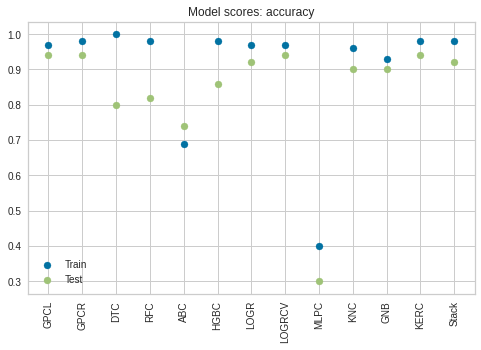

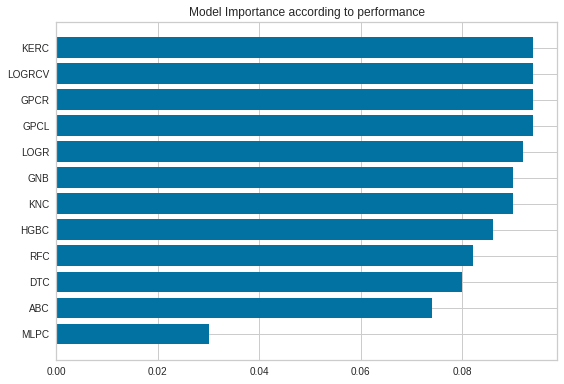

In [79]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

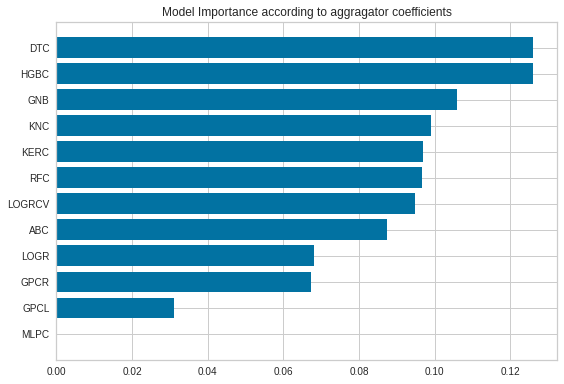

In [80]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

INFO:tensorflow:Assets written to: ram://9465316c-61cc-4b76-af4b-22df93756b06/assets
INFO:tensorflow:Assets written to: ram://4e1cd896-a742-4359-a864-dac3dbe2a38d/assets
INFO:tensorflow:Assets written to: ram://00e8709d-c699-4070-950d-62f9293debf5/assets
INFO:tensorflow:Assets written to: ram://8f77f8fb-f8d2-4643-8c5a-164c072530a7/assets


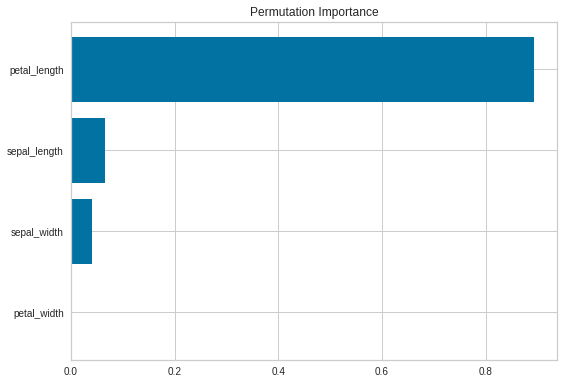

array([['petal_width', 0.0],
       ['sepal_width', 0.04075235109717873],
       ['sepal_length', 0.06583072100313485],
       ['petal_length', 0.8934169278996864]], dtype=object)

In [81]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [82]:
features_of_interest = []

INFO:tensorflow:Assets written to: ram://bf6a2478-cef1-474f-892e-0221686464e4/assets
INFO:tensorflow:Assets written to: ram://26cde30f-4245-4c06-9d00-76b739181c03/assets
INFO:tensorflow:Assets written to: ram://303d13e3-096c-4cce-9ef8-fd4b7cc7864d/assets
INFO:tensorflow:Assets written to: ram://ce3cddc1-31b5-4161-ab87-1c20585d9b92/assets


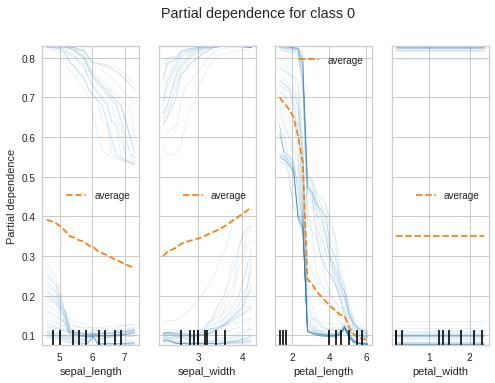

INFO:tensorflow:Assets written to: ram://5736ba70-7a9d-47f1-948d-55ba756e505a/assets
INFO:tensorflow:Assets written to: ram://1536929e-40fe-407b-8c83-5f1bca3b77ec/assets
INFO:tensorflow:Assets written to: ram://681095f5-cd5e-4ff7-9f73-60a5322baea9/assets
INFO:tensorflow:Assets written to: ram://dd343986-74d3-4710-9a5e-0def5350b00a/assets


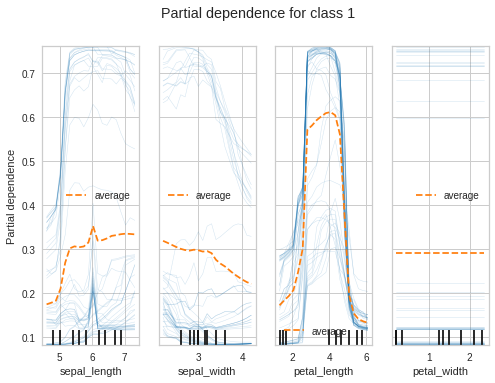

INFO:tensorflow:Assets written to: ram://96eb14fd-9f8b-4d97-8193-351e93d72086/assets
INFO:tensorflow:Assets written to: ram://9e13714b-c8a3-46b8-8815-6302506d2021/assets
INFO:tensorflow:Assets written to: ram://e1995090-ece1-4523-a25c-1e517f73612e/assets
INFO:tensorflow:Assets written to: ram://345cd081-bdd4-4d09-b804-1fb4e0d3adfa/assets


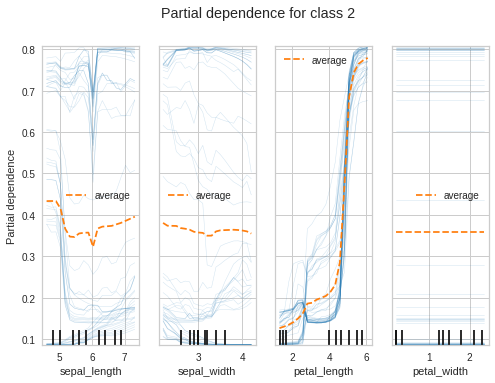

In [83]:
plot_partial_dependence(model, X_train, features_of_interest)

#### ROC/AUC

In [84]:
classes = y.unique()

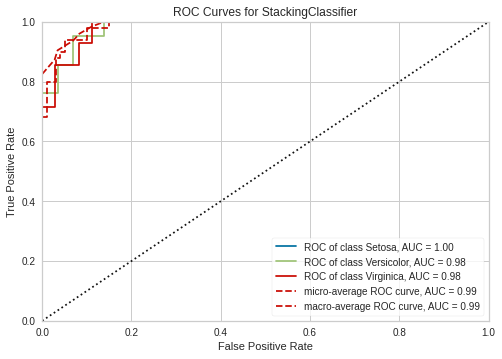

In [85]:
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Classification report

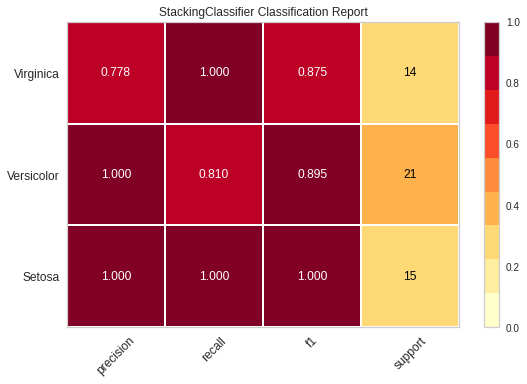

In [86]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Confusion matrix

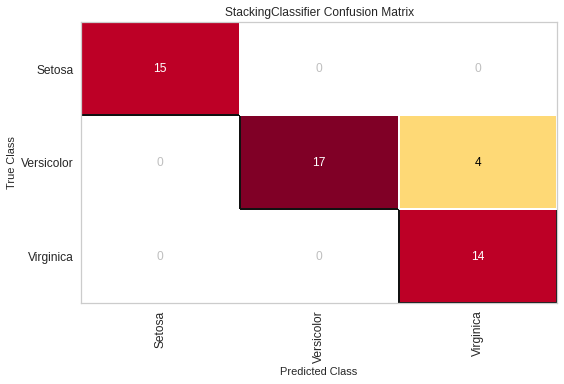

In [87]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Class prediction error

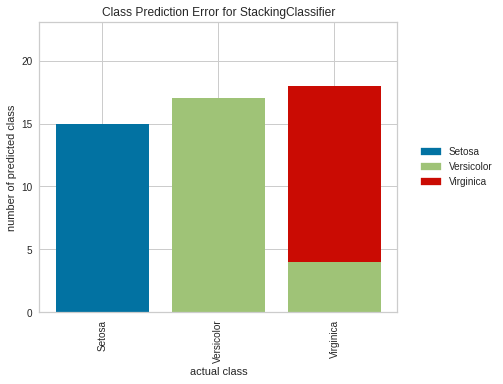

In [88]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

### Final Model

In [89]:
threshold_model = 5

In [90]:
threshold_score = 0.5

##### Filtered Level-0 models

In [91]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [92]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9])

##### Build final model

In [93]:
model = StackingClassifier(level_0_f, final_estimator=level_1)

### Final Model fitting

In [94]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

Epoch 1/2000
2/2 [==============================] - 2s 369ms/step - loss: 1.8170 - accuracy: 0.1000 - val_loss: 1.2250 - val_accuracy: 0.0200
Epoch 2/2000
2/2 [==============================] - 0s 72ms/step - loss: 1.7631 - accuracy: 0.1700 - val_loss: 1.2219 - val_accuracy: 0.0200
Epoch 3/2000
2/2 [==============================] - 0s 73ms/step - loss: 1.7846 - accuracy: 0.1200 - val_loss: 1.2185 - val_accuracy: 0.0200
Epoch 4/2000
2/2 [==============================] - 0s 68ms/step - loss: 1.7352 - accuracy: 0.1800 - val_loss: 1.2150 - val_accuracy: 0.0200
Epoch 5/2000
2/2 [==============================] - 0s 86ms/step - loss: 1.6739 - accuracy: 0.1500 - val_loss: 1.2112 - val_accuracy: 0.0400
Epoch 6/2000
2/2 [==============================] - 0s 72ms/step - loss: 1.6668 - accuracy: 0.2000 - val_loss: 1.2077 - val_accuracy: 0.0400
Epoch 7/2000
2/2 [==============================] - 0s 76ms/step - loss: 1.7073 - accuracy: 0.1600 - val_loss: 1.2043 - val_accuracy: 0.0600
Epoch 8/2000

2/2 [==============================] - 0s 85ms/step - loss: 0.6839 - accuracy: 0.7400 - val_loss: 0.9147 - val_accuracy: 0.7400
Epoch 59/2000
2/2 [==============================] - 0s 91ms/step - loss: 0.6278 - accuracy: 0.7900 - val_loss: 0.9074 - val_accuracy: 0.7600
Epoch 60/2000
2/2 [==============================] - 0s 90ms/step - loss: 0.6750 - accuracy: 0.7300 - val_loss: 0.9001 - val_accuracy: 0.7800
Epoch 61/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.6485 - accuracy: 0.7700 - val_loss: 0.8928 - val_accuracy: 0.7800
Epoch 62/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.6169 - accuracy: 0.7700 - val_loss: 0.8856 - val_accuracy: 0.8000
Epoch 63/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.6811 - accuracy: 0.7100 - val_loss: 0.8780 - val_accuracy: 0.8000
Epoch 64/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.6598 - accuracy: 0.7400 - val_loss: 0.8701 - val_accuracy: 0.8000
Epoch 65/2000
2/2 [=

2/2 [==============================] - 0s 69ms/step - loss: 0.3940 - accuracy: 0.8600 - val_loss: 0.4924 - val_accuracy: 0.8400
Epoch 116/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.4352 - accuracy: 0.8500 - val_loss: 0.4865 - val_accuracy: 0.8400
Epoch 117/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.3732 - accuracy: 0.8700 - val_loss: 0.4803 - val_accuracy: 0.8400
Epoch 118/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.3696 - accuracy: 0.9000 - val_loss: 0.4743 - val_accuracy: 0.8400
Epoch 119/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.3611 - accuracy: 0.9000 - val_loss: 0.4681 - val_accuracy: 0.8400
Epoch 120/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.3765 - accuracy: 0.9200 - val_loss: 0.4619 - val_accuracy: 0.8600
Epoch 121/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.4328 - accuracy: 0.7900 - val_loss: 0.4572 - val_accuracy: 0.8600
Epoch 122/2000

2/2 [==============================] - 0s 68ms/step - loss: 0.2974 - accuracy: 0.9300 - val_loss: 0.2774 - val_accuracy: 0.9600
Epoch 173/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2856 - accuracy: 0.9200 - val_loss: 0.2747 - val_accuracy: 0.9600
Epoch 174/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.3100 - accuracy: 0.9200 - val_loss: 0.2721 - val_accuracy: 0.9600
Epoch 175/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.2459 - accuracy: 0.9600 - val_loss: 0.2693 - val_accuracy: 0.9600
Epoch 176/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.2801 - accuracy: 0.8900 - val_loss: 0.2665 - val_accuracy: 0.9600
Epoch 177/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.2831 - accuracy: 0.9300 - val_loss: 0.2644 - val_accuracy: 0.9600
Epoch 178/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.2640 - accuracy: 0.9200 - val_loss: 0.2623 - val_accuracy: 0.9600
Epoch 179/2000

2/2 [==============================] - 0s 75ms/step - loss: 0.2287 - accuracy: 0.9400 - val_loss: 0.1902 - val_accuracy: 0.9400
Epoch 230/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.2528 - accuracy: 0.9100 - val_loss: 0.1889 - val_accuracy: 0.9400
Epoch 231/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.2743 - accuracy: 0.9100 - val_loss: 0.1877 - val_accuracy: 0.9400
Epoch 232/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.2254 - accuracy: 0.9400 - val_loss: 0.1865 - val_accuracy: 0.9400
Epoch 233/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.2133 - accuracy: 0.9400 - val_loss: 0.1852 - val_accuracy: 0.9400
Epoch 234/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.2043 - accuracy: 0.9400 - val_loss: 0.1838 - val_accuracy: 0.9400
Epoch 235/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.2547 - accuracy: 0.9200 - val_loss: 0.1827 - val_accuracy: 0.9400
Epoch 236/2000

2/2 [==============================] - 0s 68ms/step - loss: 0.2005 - accuracy: 0.9400 - val_loss: 0.1542 - val_accuracy: 0.9400
Epoch 287/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.2002 - accuracy: 0.9400 - val_loss: 0.1548 - val_accuracy: 0.9400
Epoch 288/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.2309 - accuracy: 0.9400 - val_loss: 0.1550 - val_accuracy: 0.9400
Epoch 289/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.1754 - accuracy: 0.9400 - val_loss: 0.1554 - val_accuracy: 0.9400
Epoch 290/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.1529 - accuracy: 0.9600 - val_loss: 0.1558 - val_accuracy: 0.9400
Epoch 291/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.2013 - accuracy: 0.9100 - val_loss: 0.1563 - val_accuracy: 0.9400
Epoch 292/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.2328 - accuracy: 0.9300 - val_loss: 0.1569 - val_accuracy: 0.9400
Epoch 293/2000

2/2 [==============================] - 0s 62ms/step - loss: 1.3678 - accuracy: 0.3750 - val_loss: 0.9829 - val_accuracy: 0.5000
Epoch 11/2000
2/2 [==============================] - 0s 63ms/step - loss: 1.4409 - accuracy: 0.4125 - val_loss: 0.9780 - val_accuracy: 0.5600
Epoch 12/2000
2/2 [==============================] - 0s 73ms/step - loss: 1.2930 - accuracy: 0.4750 - val_loss: 0.9727 - val_accuracy: 0.5800
Epoch 13/2000
2/2 [==============================] - 0s 62ms/step - loss: 1.2705 - accuracy: 0.4125 - val_loss: 0.9674 - val_accuracy: 0.6000
Epoch 14/2000
2/2 [==============================] - 0s 65ms/step - loss: 1.2052 - accuracy: 0.4750 - val_loss: 0.9616 - val_accuracy: 0.6600
Epoch 15/2000
2/2 [==============================] - 0s 80ms/step - loss: 1.2999 - accuracy: 0.4750 - val_loss: 0.9559 - val_accuracy: 0.6400
Epoch 16/2000
2/2 [==============================] - 0s 83ms/step - loss: 1.1629 - accuracy: 0.4375 - val_loss: 0.9504 - val_accuracy: 0.6200
Epoch 17/2000
2/2 [=

Epoch 68/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.7474 - accuracy: 0.7000 - val_loss: 0.6921 - val_accuracy: 0.7600
Epoch 69/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.7427 - accuracy: 0.6750 - val_loss: 0.6879 - val_accuracy: 0.7600
Epoch 70/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.7500 - accuracy: 0.6750 - val_loss: 0.6831 - val_accuracy: 0.7600
Epoch 71/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.7987 - accuracy: 0.6250 - val_loss: 0.6791 - val_accuracy: 0.7600
Epoch 72/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.7933 - accuracy: 0.6750 - val_loss: 0.6734 - val_accuracy: 0.7600
Epoch 73/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.7125 - accuracy: 0.6750 - val_loss: 0.6685 - val_accuracy: 0.7600
Epoch 74/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.6703 - accuracy: 0.7500 - val_loss: 0.6640 - val_accuracy: 0.7600
Epoch 

2/2 [==============================] - 0s 66ms/step - loss: 0.5819 - accuracy: 0.7250 - val_loss: 0.4910 - val_accuracy: 0.9000
Epoch 126/2000
2/2 [==============================] - 0s 87ms/step - loss: 0.5631 - accuracy: 0.7625 - val_loss: 0.4895 - val_accuracy: 0.8800
Epoch 127/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.6019 - accuracy: 0.7250 - val_loss: 0.4863 - val_accuracy: 0.8800
Epoch 128/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.5704 - accuracy: 0.7375 - val_loss: 0.4847 - val_accuracy: 0.8800
Epoch 129/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.6256 - accuracy: 0.7000 - val_loss: 0.4826 - val_accuracy: 0.8800
Epoch 130/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.6239 - accuracy: 0.7500 - val_loss: 0.4804 - val_accuracy: 0.8800
Epoch 131/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.5494 - accuracy: 0.7375 - val_loss: 0.4778 - val_accuracy: 0.8800
Epoch 132/2000

2/2 [==============================] - 0s 64ms/step - loss: 0.4177 - accuracy: 0.8375 - val_loss: 0.3603 - val_accuracy: 0.8600
Epoch 183/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.3960 - accuracy: 0.8375 - val_loss: 0.3583 - val_accuracy: 0.8600
Epoch 184/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.3308 - accuracy: 0.8875 - val_loss: 0.3561 - val_accuracy: 0.8600
Epoch 185/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.3885 - accuracy: 0.8875 - val_loss: 0.3535 - val_accuracy: 0.8600
Epoch 186/2000
2/2 [==============================] - 0s 87ms/step - loss: 0.4853 - accuracy: 0.8250 - val_loss: 0.3511 - val_accuracy: 0.8400
Epoch 187/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.3758 - accuracy: 0.8375 - val_loss: 0.3494 - val_accuracy: 0.8400
Epoch 188/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.4163 - accuracy: 0.8375 - val_loss: 0.3483 - val_accuracy: 0.8400
Epoch 189/2000

2/2 [==============================] - 0s 75ms/step - loss: 0.3310 - accuracy: 0.8625 - val_loss: 0.2656 - val_accuracy: 0.8800
Epoch 240/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2595 - accuracy: 0.9250 - val_loss: 0.2655 - val_accuracy: 0.8800
Epoch 241/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.3235 - accuracy: 0.8750 - val_loss: 0.2641 - val_accuracy: 0.8800
Epoch 242/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.2500 - accuracy: 0.9000 - val_loss: 0.2626 - val_accuracy: 0.8800
Epoch 243/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.3073 - accuracy: 0.9000 - val_loss: 0.2615 - val_accuracy: 0.8800
Epoch 244/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.3012 - accuracy: 0.8875 - val_loss: 0.2600 - val_accuracy: 0.8800
Epoch 245/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.3044 - accuracy: 0.8500 - val_loss: 0.2585 - val_accuracy: 0.8800
Epoch 246/2000

2/2 [==============================] - 0s 72ms/step - loss: 0.2529 - accuracy: 0.8750 - val_loss: 0.1963 - val_accuracy: 0.9400
Epoch 297/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.2072 - accuracy: 0.9375 - val_loss: 0.1955 - val_accuracy: 0.9600
Epoch 298/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.2401 - accuracy: 0.9000 - val_loss: 0.1954 - val_accuracy: 0.9600
Epoch 299/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.3145 - accuracy: 0.8625 - val_loss: 0.1952 - val_accuracy: 0.9600
Epoch 300/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2590 - accuracy: 0.8875 - val_loss: 0.1942 - val_accuracy: 0.9600
Epoch 301/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.2434 - accuracy: 0.9250 - val_loss: 0.1932 - val_accuracy: 0.9600
Epoch 302/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.3098 - accuracy: 0.8750 - val_loss: 0.1926 - val_accuracy: 0.9200
Epoch 303/2000

2/2 [==============================] - 0s 70ms/step - loss: 0.2222 - accuracy: 0.9500 - val_loss: 0.1696 - val_accuracy: 0.9600
Epoch 354/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2395 - accuracy: 0.9375 - val_loss: 0.1699 - val_accuracy: 0.9600
Epoch 355/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.1895 - accuracy: 0.9375 - val_loss: 0.1707 - val_accuracy: 0.9600
Epoch 356/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.2459 - accuracy: 0.9000 - val_loss: 0.1709 - val_accuracy: 0.9600
Epoch 357/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.2446 - accuracy: 0.9000 - val_loss: 0.1707 - val_accuracy: 0.9600
Epoch 358/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.2178 - accuracy: 0.9125 - val_loss: 0.1712 - val_accuracy: 0.9600
Epoch 359/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.2210 - accuracy: 0.9250 - val_loss: 0.1714 - val_accuracy: 0.9600
Epoch 360/2000

2/2 [==============================] - 0s 81ms/step - loss: 0.6793 - accuracy: 0.7375 - val_loss: 0.8951 - val_accuracy: 0.5600
Epoch 43/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.6982 - accuracy: 0.7125 - val_loss: 0.8874 - val_accuracy: 0.5600
Epoch 44/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.7528 - accuracy: 0.7500 - val_loss: 0.8791 - val_accuracy: 0.5600
Epoch 45/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.7188 - accuracy: 0.7375 - val_loss: 0.8717 - val_accuracy: 0.5600
Epoch 46/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.6766 - accuracy: 0.6625 - val_loss: 0.8635 - val_accuracy: 0.5600
Epoch 47/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.6527 - accuracy: 0.8000 - val_loss: 0.8562 - val_accuracy: 0.5800
Epoch 48/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.7473 - accuracy: 0.7500 - val_loss: 0.8486 - val_accuracy: 0.5800
Epoch 49/2000
2/2 [=

Epoch 100/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.4369 - accuracy: 0.8875 - val_loss: 0.5123 - val_accuracy: 0.8800
Epoch 101/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.5152 - accuracy: 0.8125 - val_loss: 0.5084 - val_accuracy: 0.8800
Epoch 102/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.4083 - accuracy: 0.8375 - val_loss: 0.5045 - val_accuracy: 0.8800
Epoch 103/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.4629 - accuracy: 0.8375 - val_loss: 0.5004 - val_accuracy: 0.8800
Epoch 104/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.4746 - accuracy: 0.7875 - val_loss: 0.4957 - val_accuracy: 0.8800
Epoch 105/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.4108 - accuracy: 0.8750 - val_loss: 0.4920 - val_accuracy: 0.8800
Epoch 106/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.4105 - accuracy: 0.8625 - val_loss: 0.4884 - val_accuracy: 0.8800

2/2 [==============================] - 0s 68ms/step - loss: 0.3470 - accuracy: 0.8875 - val_loss: 0.3461 - val_accuracy: 0.9400
Epoch 158/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2684 - accuracy: 0.9375 - val_loss: 0.3440 - val_accuracy: 0.9400
Epoch 159/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.3239 - accuracy: 0.9000 - val_loss: 0.3411 - val_accuracy: 0.9400
Epoch 160/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.3934 - accuracy: 0.8500 - val_loss: 0.3388 - val_accuracy: 0.9400
Epoch 161/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.3321 - accuracy: 0.9250 - val_loss: 0.3368 - val_accuracy: 0.9400
Epoch 162/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.3301 - accuracy: 0.8875 - val_loss: 0.3349 - val_accuracy: 0.9400
Epoch 163/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.3003 - accuracy: 0.8750 - val_loss: 0.3329 - val_accuracy: 0.9400
Epoch 164/2000

2/2 [==============================] - 0s 66ms/step - loss: 0.2298 - accuracy: 0.9500 - val_loss: 0.2602 - val_accuracy: 0.9400
Epoch 215/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2955 - accuracy: 0.9250 - val_loss: 0.2596 - val_accuracy: 0.9400
Epoch 216/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.2768 - accuracy: 0.8750 - val_loss: 0.2585 - val_accuracy: 0.9200
Epoch 217/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.2550 - accuracy: 0.9625 - val_loss: 0.2583 - val_accuracy: 0.9400
Epoch 218/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.3098 - accuracy: 0.8500 - val_loss: 0.2575 - val_accuracy: 0.9200
Epoch 219/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2723 - accuracy: 0.9375 - val_loss: 0.2570 - val_accuracy: 0.9200
Epoch 220/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.2659 - accuracy: 0.9000 - val_loss: 0.2566 - val_accuracy: 0.9400
Epoch 221/2000

2/2 [==============================] - 0s 64ms/step - loss: 0.2238 - accuracy: 0.9500 - val_loss: 0.2147 - val_accuracy: 0.9200
Epoch 272/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.1816 - accuracy: 0.9625 - val_loss: 0.2140 - val_accuracy: 0.9200
Epoch 273/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.2926 - accuracy: 0.9125 - val_loss: 0.2133 - val_accuracy: 0.9200
Epoch 274/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.1964 - accuracy: 0.9625 - val_loss: 0.2131 - val_accuracy: 0.9200
Epoch 275/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.2396 - accuracy: 0.9125 - val_loss: 0.2124 - val_accuracy: 0.9200
Epoch 276/2000
2/2 [==============================] - 0s 82ms/step - loss: 0.2596 - accuracy: 0.9000 - val_loss: 0.2120 - val_accuracy: 0.9200
Epoch 277/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.1855 - accuracy: 0.9750 - val_loss: 0.2111 - val_accuracy: 0.9400
Epoch 278/2000

2/2 [==============================] - 0s 74ms/step - loss: 0.3000 - accuracy: 0.8750 - val_loss: 0.1733 - val_accuracy: 0.9400
Epoch 329/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.2063 - accuracy: 0.9375 - val_loss: 0.1736 - val_accuracy: 0.9400
Epoch 330/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.2623 - accuracy: 0.9125 - val_loss: 0.1741 - val_accuracy: 0.9600
Epoch 331/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.1868 - accuracy: 0.9125 - val_loss: 0.1747 - val_accuracy: 0.9600
Epoch 332/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.2366 - accuracy: 0.9000 - val_loss: 0.1752 - val_accuracy: 0.9600
Epoch 333/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.2488 - accuracy: 0.9250 - val_loss: 0.1758 - val_accuracy: 0.9600
Epoch 334/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.1465 - accuracy: 0.9875 - val_loss: 0.1759 - val_accuracy: 0.9800
Epoch 335/2000

2/2 [==============================] - 0s 69ms/step - loss: 0.1823 - accuracy: 0.9625 - val_loss: 0.1588 - val_accuracy: 0.9600
Epoch 386/2000
2/2 [==============================] - 0s 80ms/step - loss: 0.1687 - accuracy: 0.9500 - val_loss: 0.1586 - val_accuracy: 0.9600
Epoch 387/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.1913 - accuracy: 0.9375 - val_loss: 0.1585 - val_accuracy: 0.9600
Epoch 388/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2197 - accuracy: 0.9125 - val_loss: 0.1590 - val_accuracy: 0.9600
Epoch 389/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.1937 - accuracy: 0.9375 - val_loss: 0.1591 - val_accuracy: 0.9600
Epoch 390/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.2307 - accuracy: 0.9250 - val_loss: 0.1588 - val_accuracy: 0.9600
Epoch 391/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2474 - accuracy: 0.9125 - val_loss: 0.1592 - val_accuracy: 0.9600
Epoch 392/2000

2/2 [==============================] - 0s 67ms/step - loss: 0.1911 - accuracy: 0.9375 - val_loss: 0.1446 - val_accuracy: 0.9600
Epoch 443/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.1553 - accuracy: 0.9500 - val_loss: 0.1438 - val_accuracy: 0.9600
Epoch 444/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.2168 - accuracy: 0.9125 - val_loss: 0.1432 - val_accuracy: 0.9600
Epoch 445/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.1485 - accuracy: 0.9625 - val_loss: 0.1420 - val_accuracy: 0.9600
Epoch 446/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.2258 - accuracy: 0.9000 - val_loss: 0.1413 - val_accuracy: 0.9600
Epoch 447/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.1937 - accuracy: 0.9500 - val_loss: 0.1416 - val_accuracy: 0.9600
Epoch 448/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.1844 - accuracy: 0.9375 - val_loss: 0.1416 - val_accuracy: 0.9600
Epoch 449/2000

2/2 [==============================] - 0s 71ms/step - loss: 1.0360 - accuracy: 0.4625 - val_loss: 1.0084 - val_accuracy: 0.4400
Epoch 18/2000
2/2 [==============================] - 0s 84ms/step - loss: 0.8975 - accuracy: 0.6000 - val_loss: 0.9998 - val_accuracy: 0.4600
Epoch 19/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.9634 - accuracy: 0.5500 - val_loss: 0.9907 - val_accuracy: 0.4800
Epoch 20/2000
2/2 [==============================] - 0s 70ms/step - loss: 1.0234 - accuracy: 0.5625 - val_loss: 0.9828 - val_accuracy: 0.4600
Epoch 21/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.9757 - accuracy: 0.5750 - val_loss: 0.9746 - val_accuracy: 0.4600
Epoch 22/2000
2/2 [==============================] - 0s 80ms/step - loss: 1.0760 - accuracy: 0.5000 - val_loss: 0.9665 - val_accuracy: 0.4600
Epoch 23/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.9514 - accuracy: 0.5500 - val_loss: 0.9583 - val_accuracy: 0.4800
Epoch 24/2000
2/2 [=

Epoch 75/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.5770 - accuracy: 0.7750 - val_loss: 0.6380 - val_accuracy: 0.6000
Epoch 76/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.5882 - accuracy: 0.7625 - val_loss: 0.6342 - val_accuracy: 0.6000
Epoch 77/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.4753 - accuracy: 0.7750 - val_loss: 0.6302 - val_accuracy: 0.6000
Epoch 78/2000
2/2 [==============================] - 0s 80ms/step - loss: 0.5370 - accuracy: 0.7875 - val_loss: 0.6262 - val_accuracy: 0.6000
Epoch 79/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.6349 - accuracy: 0.7125 - val_loss: 0.6221 - val_accuracy: 0.6000
Epoch 80/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.5801 - accuracy: 0.7250 - val_loss: 0.6180 - val_accuracy: 0.6000
Epoch 81/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.5154 - accuracy: 0.8125 - val_loss: 0.6140 - val_accuracy: 0.6000
Epoch 

2/2 [==============================] - 0s 79ms/step - loss: 0.4093 - accuracy: 0.8375 - val_loss: 0.4378 - val_accuracy: 0.7600
Epoch 133/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.3913 - accuracy: 0.9000 - val_loss: 0.4350 - val_accuracy: 0.7600
Epoch 134/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.3963 - accuracy: 0.8625 - val_loss: 0.4329 - val_accuracy: 0.7600
Epoch 135/2000
2/2 [==============================] - 0s 79ms/step - loss: 0.4805 - accuracy: 0.8250 - val_loss: 0.4306 - val_accuracy: 0.7600
Epoch 136/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.4598 - accuracy: 0.8250 - val_loss: 0.4276 - val_accuracy: 0.7600
Epoch 137/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.4540 - accuracy: 0.8125 - val_loss: 0.4254 - val_accuracy: 0.7600
Epoch 138/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.3837 - accuracy: 0.8750 - val_loss: 0.4231 - val_accuracy: 0.7600
Epoch 139/2000

2/2 [==============================] - 0s 82ms/step - loss: 0.3127 - accuracy: 0.9125 - val_loss: 0.3113 - val_accuracy: 0.9600
Epoch 190/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.3077 - accuracy: 0.8875 - val_loss: 0.3091 - val_accuracy: 0.9600
Epoch 191/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2991 - accuracy: 0.9125 - val_loss: 0.3064 - val_accuracy: 0.9600
Epoch 192/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.3144 - accuracy: 0.9000 - val_loss: 0.3043 - val_accuracy: 0.9600
Epoch 193/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.3616 - accuracy: 0.8375 - val_loss: 0.3027 - val_accuracy: 0.9600
Epoch 194/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.3200 - accuracy: 0.8625 - val_loss: 0.3012 - val_accuracy: 0.9600
Epoch 195/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.4069 - accuracy: 0.8875 - val_loss: 0.2997 - val_accuracy: 0.9600
Epoch 196/2000

2/2 [==============================] - 0s 85ms/step - loss: 0.2181 - accuracy: 0.9250 - val_loss: 0.2394 - val_accuracy: 0.9600
Epoch 247/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.2924 - accuracy: 0.9125 - val_loss: 0.2387 - val_accuracy: 0.9600
Epoch 248/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.2635 - accuracy: 0.9375 - val_loss: 0.2383 - val_accuracy: 0.9600
Epoch 249/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.2659 - accuracy: 0.9125 - val_loss: 0.2380 - val_accuracy: 0.9600
Epoch 250/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.2350 - accuracy: 0.9375 - val_loss: 0.2383 - val_accuracy: 0.9600
Epoch 251/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2561 - accuracy: 0.8875 - val_loss: 0.2376 - val_accuracy: 0.9600
Epoch 252/2000
2/2 [==============================] - 0s 81ms/step - loss: 0.2859 - accuracy: 0.8750 - val_loss: 0.2372 - val_accuracy: 0.9600
Epoch 253/2000

2/2 [==============================] - 0s 63ms/step - loss: 0.1906 - accuracy: 0.9375 - val_loss: 0.2044 - val_accuracy: 0.9600
Epoch 304/2000
2/2 [==============================] - 0s 89ms/step - loss: 0.3151 - accuracy: 0.8625 - val_loss: 0.2035 - val_accuracy: 0.9400
Epoch 305/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.1930 - accuracy: 0.9375 - val_loss: 0.2013 - val_accuracy: 0.9400
Epoch 306/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.2386 - accuracy: 0.9250 - val_loss: 0.2003 - val_accuracy: 0.9400
Epoch 307/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2458 - accuracy: 0.9375 - val_loss: 0.1993 - val_accuracy: 0.9600
Epoch 308/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.2444 - accuracy: 0.9375 - val_loss: 0.1989 - val_accuracy: 0.9600
Epoch 309/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.2315 - accuracy: 0.9000 - val_loss: 0.1986 - val_accuracy: 0.9600
Epoch 310/2000

2/2 [==============================] - 0s 68ms/step - loss: 1.2890 - accuracy: 0.4750 - val_loss: 1.0110 - val_accuracy: 0.4400
Epoch 7/2000
2/2 [==============================] - 0s 76ms/step - loss: 1.1068 - accuracy: 0.5375 - val_loss: 1.0075 - val_accuracy: 0.4600
Epoch 8/2000
2/2 [==============================] - 0s 59ms/step - loss: 1.2776 - accuracy: 0.5000 - val_loss: 1.0028 - val_accuracy: 0.4600
Epoch 9/2000
2/2 [==============================] - 0s 68ms/step - loss: 1.1855 - accuracy: 0.4875 - val_loss: 0.9975 - val_accuracy: 0.4800
Epoch 10/2000
2/2 [==============================] - 0s 76ms/step - loss: 1.1989 - accuracy: 0.5375 - val_loss: 0.9917 - val_accuracy: 0.4800
Epoch 11/2000
2/2 [==============================] - 0s 62ms/step - loss: 1.1267 - accuracy: 0.4500 - val_loss: 0.9863 - val_accuracy: 0.4800
Epoch 12/2000
2/2 [==============================] - 0s 62ms/step - loss: 1.1771 - accuracy: 0.5125 - val_loss: 0.9826 - val_accuracy: 0.4800
Epoch 13/2000
2/2 [====

Epoch 64/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.5527 - accuracy: 0.7250 - val_loss: 0.6892 - val_accuracy: 0.7400
Epoch 65/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.6188 - accuracy: 0.7125 - val_loss: 0.6832 - val_accuracy: 0.7400
Epoch 66/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.5611 - accuracy: 0.7500 - val_loss: 0.6782 - val_accuracy: 0.7600
Epoch 67/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.5139 - accuracy: 0.7750 - val_loss: 0.6739 - val_accuracy: 0.7600
Epoch 68/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.6318 - accuracy: 0.6625 - val_loss: 0.6700 - val_accuracy: 0.7600
Epoch 69/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.5556 - accuracy: 0.7625 - val_loss: 0.6653 - val_accuracy: 0.7600
Epoch 70/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.6748 - accuracy: 0.6750 - val_loss: 0.6615 - val_accuracy: 0.7400
Epoch 

2/2 [==============================] - 0s 63ms/step - loss: 0.4717 - accuracy: 0.8125 - val_loss: 0.4801 - val_accuracy: 0.7800
Epoch 122/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.5308 - accuracy: 0.7375 - val_loss: 0.4780 - val_accuracy: 0.7800
Epoch 123/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.4740 - accuracy: 0.7375 - val_loss: 0.4761 - val_accuracy: 0.7800
Epoch 124/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.4891 - accuracy: 0.7500 - val_loss: 0.4740 - val_accuracy: 0.7800
Epoch 125/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.4076 - accuracy: 0.8000 - val_loss: 0.4729 - val_accuracy: 0.7800
Epoch 126/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.4502 - accuracy: 0.7875 - val_loss: 0.4708 - val_accuracy: 0.7800
Epoch 127/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.4825 - accuracy: 0.8000 - val_loss: 0.4693 - val_accuracy: 0.7800
Epoch 128/2000

2/2 [==============================] - 0s 80ms/step - loss: 0.5866 - accuracy: 0.7375 - val_loss: 0.4016 - val_accuracy: 0.8600
Epoch 179/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.3905 - accuracy: 0.8375 - val_loss: 0.4011 - val_accuracy: 0.8600
Epoch 180/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.3488 - accuracy: 0.8625 - val_loss: 0.4003 - val_accuracy: 0.8600
Epoch 181/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.3961 - accuracy: 0.8125 - val_loss: 0.3995 - val_accuracy: 0.8600
Epoch 182/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.3912 - accuracy: 0.8375 - val_loss: 0.3983 - val_accuracy: 0.8600
Epoch 183/2000
2/2 [==============================] - 0s 80ms/step - loss: 0.3725 - accuracy: 0.8000 - val_loss: 0.3974 - val_accuracy: 0.8600
Epoch 184/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.4184 - accuracy: 0.8125 - val_loss: 0.3969 - val_accuracy: 0.8600
Epoch 185/2000

2/2 [==============================] - 0s 76ms/step - loss: 0.3298 - accuracy: 0.8375 - val_loss: 0.3471 - val_accuracy: 0.8600
Epoch 236/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.4932 - accuracy: 0.7875 - val_loss: 0.3458 - val_accuracy: 0.8600
Epoch 237/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.3084 - accuracy: 0.8500 - val_loss: 0.3435 - val_accuracy: 0.8600
Epoch 238/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.3418 - accuracy: 0.8750 - val_loss: 0.3414 - val_accuracy: 0.8600
Epoch 239/2000
2/2 [==============================] - 0s 80ms/step - loss: 0.3492 - accuracy: 0.8375 - val_loss: 0.3397 - val_accuracy: 0.8600
Epoch 240/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.3344 - accuracy: 0.8500 - val_loss: 0.3368 - val_accuracy: 0.8600
Epoch 241/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.3617 - accuracy: 0.8500 - val_loss: 0.3354 - val_accuracy: 0.8600
Epoch 242/2000

2/2 [==============================] - 0s 66ms/step - loss: 0.2897 - accuracy: 0.9125 - val_loss: 0.2715 - val_accuracy: 0.9000
Epoch 293/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.2757 - accuracy: 0.9000 - val_loss: 0.2700 - val_accuracy: 0.9000
Epoch 294/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2693 - accuracy: 0.8625 - val_loss: 0.2684 - val_accuracy: 0.9000
Epoch 295/2000
2/2 [==============================] - 0s 77ms/step - loss: 0.2429 - accuracy: 0.9500 - val_loss: 0.2678 - val_accuracy: 0.9000
Epoch 296/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.2624 - accuracy: 0.8750 - val_loss: 0.2668 - val_accuracy: 0.9000
Epoch 297/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.2683 - accuracy: 0.8500 - val_loss: 0.2664 - val_accuracy: 0.9000
Epoch 298/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2702 - accuracy: 0.8875 - val_loss: 0.2658 - val_accuracy: 0.9000
Epoch 299/2000

2/2 [==============================] - 0s 89ms/step - loss: 0.2142 - accuracy: 0.9500 - val_loss: 0.2233 - val_accuracy: 0.9000
Epoch 350/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.2030 - accuracy: 0.9000 - val_loss: 0.2232 - val_accuracy: 0.9000
Epoch 351/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2490 - accuracy: 0.9125 - val_loss: 0.2226 - val_accuracy: 0.9000
Epoch 352/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2692 - accuracy: 0.9250 - val_loss: 0.2216 - val_accuracy: 0.9000
Epoch 353/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.2348 - accuracy: 0.9125 - val_loss: 0.2204 - val_accuracy: 0.9000
Epoch 354/2000
2/2 [==============================] - 0s 75ms/step - loss: 0.2354 - accuracy: 0.9250 - val_loss: 0.2201 - val_accuracy: 0.9000
Epoch 355/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.2383 - accuracy: 0.9000 - val_loss: 0.2197 - val_accuracy: 0.9000
Epoch 356/2000

2/2 [==============================] - 0s 82ms/step - loss: 0.1596 - accuracy: 0.9625 - val_loss: 0.1870 - val_accuracy: 0.9600
Epoch 407/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.1604 - accuracy: 0.9250 - val_loss: 0.1856 - val_accuracy: 0.9600
Epoch 408/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2045 - accuracy: 0.9500 - val_loss: 0.1849 - val_accuracy: 0.9400
Epoch 409/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2903 - accuracy: 0.8750 - val_loss: 0.1829 - val_accuracy: 0.9600
Epoch 410/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.1744 - accuracy: 0.9500 - val_loss: 0.1821 - val_accuracy: 0.9600
Epoch 411/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.1904 - accuracy: 0.9500 - val_loss: 0.1815 - val_accuracy: 0.9600
Epoch 412/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2349 - accuracy: 0.9250 - val_loss: 0.1814 - val_accuracy: 0.9600
Epoch 413/2000

2/2 [==============================] - 0s 67ms/step - loss: 0.2238 - accuracy: 0.9250 - val_loss: 0.1573 - val_accuracy: 0.9400
Epoch 464/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.1824 - accuracy: 0.9625 - val_loss: 0.1561 - val_accuracy: 0.9400
Epoch 465/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.1538 - accuracy: 0.9625 - val_loss: 0.1560 - val_accuracy: 0.9400
Epoch 466/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.1492 - accuracy: 0.9875 - val_loss: 0.1558 - val_accuracy: 0.9400
Epoch 467/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.1505 - accuracy: 0.9500 - val_loss: 0.1551 - val_accuracy: 0.9400
Epoch 468/2000
2/2 [==============================] - 0s 59ms/step - loss: 0.1610 - accuracy: 0.9375 - val_loss: 0.1550 - val_accuracy: 0.9400
Epoch 469/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.1356 - accuracy: 0.9500 - val_loss: 0.1544 - val_accuracy: 0.9400
Epoch 470/2000

2/2 [==============================] - 0s 66ms/step - loss: 0.7330 - accuracy: 0.7000 - val_loss: 0.9382 - val_accuracy: 0.5400
Epoch 50/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.8532 - accuracy: 0.6250 - val_loss: 0.9306 - val_accuracy: 0.5800
Epoch 51/2000
2/2 [==============================] - 0s 61ms/step - loss: 0.8360 - accuracy: 0.5875 - val_loss: 0.9226 - val_accuracy: 0.5800
Epoch 52/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.7644 - accuracy: 0.6250 - val_loss: 0.9147 - val_accuracy: 0.6000
Epoch 53/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.7269 - accuracy: 0.6750 - val_loss: 0.9068 - val_accuracy: 0.6000
Epoch 54/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.7586 - accuracy: 0.6375 - val_loss: 0.8991 - val_accuracy: 0.6200
Epoch 55/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.8290 - accuracy: 0.5875 - val_loss: 0.8911 - val_accuracy: 0.6400
Epoch 56/2000
2/2 [=

Epoch 107/2000
2/2 [==============================] - 0s 96ms/step - loss: 0.5652 - accuracy: 0.7000 - val_loss: 0.5758 - val_accuracy: 0.9000
Epoch 108/2000
2/2 [==============================] - 0s 83ms/step - loss: 0.6196 - accuracy: 0.7125 - val_loss: 0.5713 - val_accuracy: 0.9000
Epoch 109/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.5005 - accuracy: 0.8250 - val_loss: 0.5668 - val_accuracy: 0.9000
Epoch 110/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.4919 - accuracy: 0.7875 - val_loss: 0.5624 - val_accuracy: 0.9000
Epoch 111/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.4975 - accuracy: 0.7875 - val_loss: 0.5584 - val_accuracy: 0.9000
Epoch 112/2000
2/2 [==============================] - 0s 76ms/step - loss: 0.4517 - accuracy: 0.9000 - val_loss: 0.5543 - val_accuracy: 0.9000
Epoch 113/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.4983 - accuracy: 0.8125 - val_loss: 0.5501 - val_accuracy: 0.9200

2/2 [==============================] - 0s 72ms/step - loss: 0.4499 - accuracy: 0.8500 - val_loss: 0.3976 - val_accuracy: 0.9200
Epoch 165/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.4298 - accuracy: 0.8625 - val_loss: 0.3954 - val_accuracy: 0.9200
Epoch 166/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.3845 - accuracy: 0.8625 - val_loss: 0.3936 - val_accuracy: 0.9200
Epoch 167/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.3787 - accuracy: 0.8375 - val_loss: 0.3920 - val_accuracy: 0.9200
Epoch 168/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.4177 - accuracy: 0.8375 - val_loss: 0.3902 - val_accuracy: 0.9200
Epoch 169/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.4013 - accuracy: 0.8625 - val_loss: 0.3882 - val_accuracy: 0.9200
Epoch 170/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.4326 - accuracy: 0.8375 - val_loss: 0.3864 - val_accuracy: 0.9200
Epoch 171/2000

2/2 [==============================] - 0s 66ms/step - loss: 0.3482 - accuracy: 0.8625 - val_loss: 0.3014 - val_accuracy: 0.9600
Epoch 222/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.3379 - accuracy: 0.8750 - val_loss: 0.3007 - val_accuracy: 0.9600
Epoch 223/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.3221 - accuracy: 0.8875 - val_loss: 0.2998 - val_accuracy: 0.9600
Epoch 224/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.3667 - accuracy: 0.8500 - val_loss: 0.2993 - val_accuracy: 0.9600
Epoch 225/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.2774 - accuracy: 0.9250 - val_loss: 0.2987 - val_accuracy: 0.9600
Epoch 226/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.3793 - accuracy: 0.8750 - val_loss: 0.2984 - val_accuracy: 0.9600
Epoch 227/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.2862 - accuracy: 0.9375 - val_loss: 0.2984 - val_accuracy: 0.9400
Epoch 228/2000

2/2 [==============================] - 0s 67ms/step - loss: 0.2745 - accuracy: 0.9375 - val_loss: 0.2317 - val_accuracy: 0.9600
Epoch 279/2000
2/2 [==============================] - 0s 69ms/step - loss: 0.2667 - accuracy: 0.9250 - val_loss: 0.2303 - val_accuracy: 0.9600
Epoch 280/2000
2/2 [==============================] - 0s 72ms/step - loss: 0.3209 - accuracy: 0.8625 - val_loss: 0.2289 - val_accuracy: 0.9600
Epoch 281/2000
2/2 [==============================] - 0s 62ms/step - loss: 0.3140 - accuracy: 0.8875 - val_loss: 0.2280 - val_accuracy: 0.9600
Epoch 282/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.2271 - accuracy: 0.9375 - val_loss: 0.2274 - val_accuracy: 0.9600
Epoch 283/2000
2/2 [==============================] - 0s 78ms/step - loss: 0.2932 - accuracy: 0.9375 - val_loss: 0.2267 - val_accuracy: 0.9600
Epoch 284/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2685 - accuracy: 0.9000 - val_loss: 0.2262 - val_accuracy: 0.9600
Epoch 285/2000

2/2 [==============================] - 0s 76ms/step - loss: 0.3153 - accuracy: 0.8875 - val_loss: 0.2065 - val_accuracy: 0.9600
Epoch 336/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2133 - accuracy: 0.9375 - val_loss: 0.2074 - val_accuracy: 0.9200
Epoch 337/2000
2/2 [==============================] - 0s 70ms/step - loss: 0.2151 - accuracy: 0.9500 - val_loss: 0.2082 - val_accuracy: 0.9200
Epoch 338/2000
2/2 [==============================] - 0s 58ms/step - loss: 0.2778 - accuracy: 0.8750 - val_loss: 0.2085 - val_accuracy: 0.9200
Epoch 339/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.1751 - accuracy: 0.9500 - val_loss: 0.2088 - val_accuracy: 0.9200
Epoch 340/2000
2/2 [==============================] - 0s 68ms/step - loss: 0.1691 - accuracy: 0.9750 - val_loss: 0.2088 - val_accuracy: 0.9200
Epoch 341/2000
2/2 [==============================] - 0s 65ms/step - loss: 0.2595 - accuracy: 0.9375 - val_loss: 0.2090 - val_accuracy: 0.9200
Epoch 342/2000

2/2 [==============================] - 0s 65ms/step - loss: 0.2473 - accuracy: 0.8750 - val_loss: 0.1801 - val_accuracy: 0.9600
Epoch 393/2000
2/2 [==============================] - 0s 74ms/step - loss: 0.2329 - accuracy: 0.9500 - val_loss: 0.1807 - val_accuracy: 0.9600
Epoch 394/2000
2/2 [==============================] - 0s 71ms/step - loss: 0.2227 - accuracy: 0.9000 - val_loss: 0.1815 - val_accuracy: 0.9600
Epoch 395/2000
2/2 [==============================] - 0s 64ms/step - loss: 0.2552 - accuracy: 0.9000 - val_loss: 0.1822 - val_accuracy: 0.9600
Epoch 396/2000
2/2 [==============================] - 0s 67ms/step - loss: 0.1966 - accuracy: 0.9375 - val_loss: 0.1831 - val_accuracy: 0.9600
Epoch 397/2000
2/2 [==============================] - 0s 73ms/step - loss: 0.2159 - accuracy: 0.9375 - val_loss: 0.1837 - val_accuracy: 0.9600
Epoch 398/2000
2/2 [==============================] - 0s 66ms/step - loss: 0.2415 - accuracy: 0.9250 - val_loss: 0.1840 - val_accuracy: 0.9600
Epoch 399/2000

StackingClassifier(estimators=[('DTC',
                                Pipeline(steps=[('columntransformer',
                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8c0b4c6a0>),
                                                                                 ('pipeline-2',
                                                                                  Pipeline(steps=[(...
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False)),
                                                                                                  ('decorrelator',
                                                                                                   Decorrelator(threshold=0.95))]),
                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff8c0b47ca0>)])),
                                                ('kerasclassifier',
                                                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff8a4f0bd90>)]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        penalty='elasticnet',
                                                        solver='saga'))

#### Final Model scoring

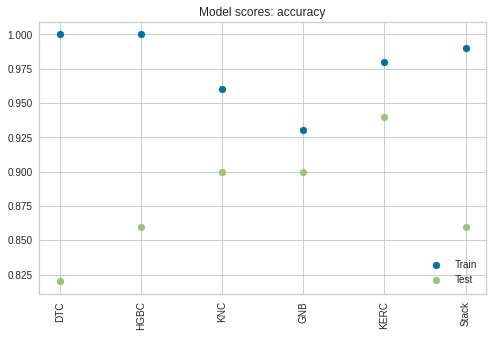

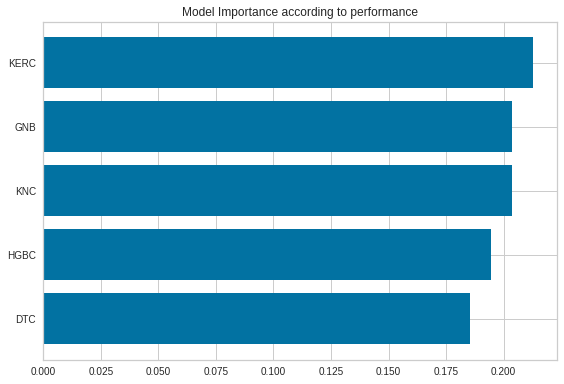

(array([['DTC', 1.0, 0.82],
        ['HGBC', 1.0, 0.86],
        ['KNC', 0.96, 0.9],
        ['GNB', 0.93, 0.9],
        ['KERC', 0.98, 0.94],
        ['Stack', 0.99, 0.86]], dtype=object),
 array([['DTC', 0.1855203619909502],
        ['HGBC', 0.19457013574660634],
        ['KNC', 0.20361990950226244],
        ['GNB', 0.20361990950226244],
        ['KERC', 0.21266968325791855]], dtype=object))

In [95]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

INFO:tensorflow:Assets written to: ram://8badf3e5-5844-4bcf-85b6-5c298264491a/assets
INFO:tensorflow:Assets written to: ram://7e5fc1a0-68c3-4a04-91a7-4235653fdb98/assets
INFO:tensorflow:Assets written to: ram://6a1ce1ea-6923-4eb1-a177-77450572b02f/assets
INFO:tensorflow:Assets written to: ram://cb1af6f6-607b-4f66-be8b-7f6ea7231b34/assets


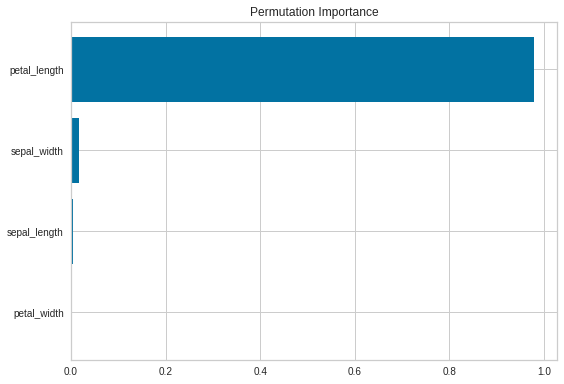

array([['petal_width', 0.0],
       ['sepal_length', 0.003508771929824564],
       ['sepal_width', 0.01754385964912282],
       ['petal_length', 0.9789473684210526]], dtype=object)

In [96]:
plot_perm_importance(model, X_test, y_test)

#### Final ROC/AUC

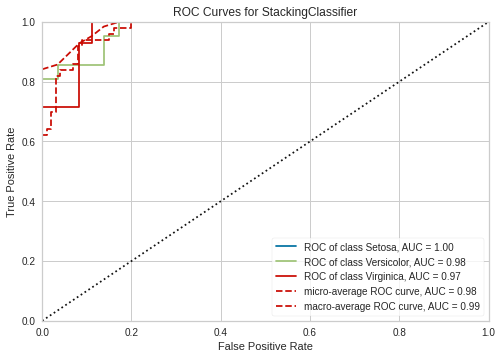

In [97]:
classes = y.unique() 
roc_auc(model, X_train, y_train, X_test = X_test, y_test = y_test, classes = classes);

#### Final Classification report

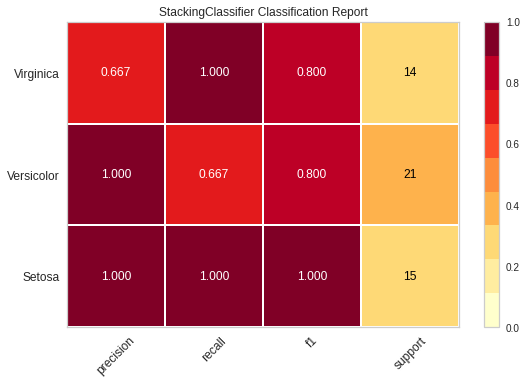

In [98]:
classification_report(model, X_train, y_train, X_test, y_test, classes=classes, support=True);

#### Final Confusion matrix

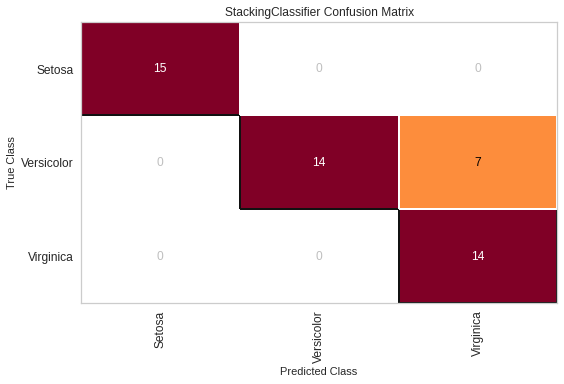

In [99]:
confusion_matrix(model, X_train, y_train, X_test, y_test, classes=classes);

#### Final Class prediction error

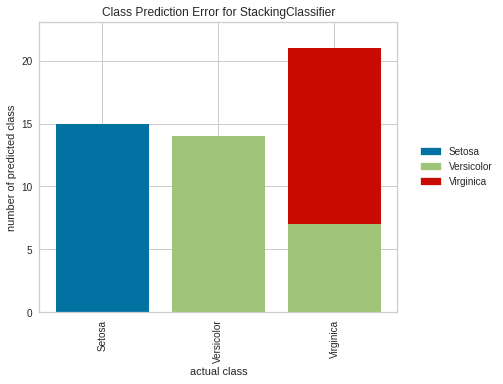

In [100]:
class_prediction_error(model, X_train, y_train, X_test, y_test, classes=classes);

## Deployment

### Save your model

In [101]:
model_name = 'model.sav' 
dump(model, model_name)

INFO:tensorflow:Assets written to: ram://f4636176-db24-477a-b2d1-79874c59ac40/assets


['model.sav']

### Generate your server

In [102]:
fastapi_server(model, 'model.sav', X, y)

### Start your server

In [ ]:
run server.py

INFO:     Started server process [8471]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:56880 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:56880 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:56886 - "POST /predict HTTP/1.1" 200 OK


### Test your API at http://127.0.0.1:8000/docs